In [3]:
import sys
import os
from glob import glob
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.3f}'.format
import matplotlib.pyplot as plt
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'
import seaborn as sns

sys.path.append("../Import")
from definitions import crop_list2

root_path = "../"
data_path = f"{root_path}data/"

In [54]:
class EDA:

    
    import numpy as np
    import pandas as pd
    pd.options.display.float_format = '{:.3f}'.format

    import matplotlib.pyplot as plt
    import koreanize_matplotlib
    %config InlineBackend.figure_format = 'retina'
    import seaborn as sns


    def __init__(
            self:pd.DataFrame,
            df,
            Product=None,
            idx=None,
            x="Price",
            y=['환율(원/US$)', '콜금리(연%)', 'item_PPI', 'item_CPI', 'Food Price Index', 'Cereals'],
            ) -> pd.DataFrame:
        

        
        self.idx = idx
        if idx != None:
            temp = df.set_index(idx)
            self.df = temp
        else:
            self.df = df

        self.Product = Product
        if Product != None:
            self.df = df[df["Product"] == "마늘"]

        self.x = x
        self.y = y



        # 로그 변환
        df_log1p = df.copy()
        for i in y:
            df_log1p[i] = np.log1p(df[i])
        self.df_log1p = df_log1p

        # 로그변환 -> 로버스트스케일링
        from sklearn.preprocessing import RobustScaler
        transformer = RobustScaler().fit_transform(df_log1p[y])
        df_log1p_robSc = df_log1p.copy()
        df_log1p_robSc[y] = transformer
        self.df_log1p_robSc = df_log1p_robSc



    def print_title(body, br=2, bp="┌▣ ", hr=" ---- ---- ---- ----"):

        """
        body : 내용
        bp : bullet point, 글머리 기호
        hr : Horizontal Rule, 수평선
        """

        class ff:
            PURPLE = "\033[95m"
            CYAN = "\033[96m"
            DARKCYAN = "\033[36m"
            BLUE = "\033[94m"
            GREEN = "\033[92m"
            YELLOW = "\033[93m"
            RED = "\033[91m"
            BOLD = "\033[1m"
            UNDERLINE = "\033[4m"
            END = "\033[0m"

        print("\n" * br + ff.BOLD + bp + ff.UNDERLINE + body + ff.END + hr)

    def Check(self) -> pd.DataFrame:

        df = self.df
        df_log1p = self.df_log1p
        df_log1p_robSc = self.df_log1p_robSc

        EDA.print_title("""df.shape""")
        print(df.shape)

        EDA.print_title("""df.info()""")
        print(df.info())

        EDA.print_title("""df.head()""")
        display(df.head())

    def uv(self) -> None:

        df = self.df
        df_log1p = self.df_log1p
        df_log1p_robSc = self.df_log1p_robSc

        EDA.print_title("""df.describe().T""")
        display(df.describe().T)

        EDA.print_title("""df.describe(include=['O'])""")
        display(df.describe(include=["O"]))

        # 결측치
        df_temp = df.isna()
        EDA.print_title("""df.isna().sum()""")
        display(df_temp.sum().to_frame())

        EDA.print_title("""sns.heatmap(data=df.isna())""")
        sns.heatmap(data=df_temp)
        plt.show()

        EDA.print_title("df.isna().mean()")
        display(df_temp.mean().to_frame())

        # 분포 - hist
        EDA.print_title("df.hist()")
        df[self.y].hist(bins=100, figsize=(20, 12))
        plt.show()
        # 로그 변환 후 분포
        EDA.print_title("df_log1p.hist()")
        df_log1p[self.y].hist(bins=100, figsize=(20, 12))
        plt.show()
        # 로그변환 -> 로버스트 스케일링 후 분포
        EDA.print_title("df_log1p_robSc.hist()")
        df_log1p_robSc[self.y].hist(bins=100, figsize=(20, 12))
        plt.show()

        # 분포 - v
        fig, axes = plt.subplots(2, 3, figsize=(20, 8))
        for i in range(2):
            for j in range(3):
                sns.violinplot(data=df, x=self.y, y=self.x, ax=axes[i][j])
                sns.plt.show()



    def mv(self) -> None:

        df = self.df
        df_log1p = self.df_log1p
        df_log1p_robSc = self.df_log1p_robSc

        df_corr = df.corr()
        EDA.print_title("""df.corr()""")
        display(df_corr)
        EDA.print_title("""sns.heatmap(data=df.corr(), annot=True, fmt=".2f")""")
        display(sns.heatmap(data=df_corr, annot=True, fmt=".2f"))

        fig, axes = plt.subplots(2, 3, figsize=(20, 8))
        for i in range(2):
            for j in range(3):
                sns.regplot(data=df, x=self.y, y=self.x, ax=axes[i][j])

In [32]:


sns.displot(data=df_raw, x=df_raw.columns[7], kde=True)

NameError: name 'df_log1p' is not defined

# EDA를 진행할 데이터 불러오고 확인하기.

In [45]:
df_raw = pd.read_csv(f"{data_path}AgriMarket.csv")
eda = EDA(df_raw, Product="마늘")
eda.Check()



┌▣ df.shape ---- ---- ---- ----
(3970, 11)


┌▣ df.info() ---- ---- ---- ----
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3970 entries, 3 to 15879
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YMD               3970 non-null   int64  
 1   YM                3970 non-null   int64  
 2   MD                3970 non-null   int64  
 3   Product           3970 non-null   object 
 4   Price             3970 non-null   float64
 5   환율(원/US$)         3970 non-null   float64
 6   콜금리(연%)           3970 non-null   float64
 7   item_PPI          3970 non-null   float64
 8   item_CPI          3970 non-null   float64
 9   Food Price Index  3970 non-null   float64
 10  Cereals           3970 non-null   float64
dtypes: float64(7), int64(3), object(1)
memory usage: 372.2+ KB
None


┌▣ df.head() ---- ---- ---- ----


,YMD,YM,MD,Product,Price,환율(원/US$),콜금리(연%),item_PPI,item_CPI,Food Price Index,Cereals
3,20050103,200501,103,마늘,20785.714,1013.000,3.330,49.580,58.270,65.400,60.500
7,20050104,200501,104,마늘,20785.714,1013.000,3.330,49.580,58.270,65.400,60.500
11,20050105,200501,105,마늘,20928.571,1013.000,3.330,49.580,58.270,65.400,60.500
15,20050106,200501,106,마늘,21071.429,1013.000,3.330,49.580,58.270,65.400,60.500
19,20050107,200501,107,마늘,21071.429,1013.000,3.330,49.580,58.270,65.400,60.500


# 단변량 EDA



┌▣ df.describe().T ---- ---- ---- ----


,count,mean,std,min,25%,50%,75%,max
YMD,3970.000,20125225.353,46176.665,20050103.000,20081217.250,20121166.500,20161214.750,20201231.000
YM,3970.000,201252.093,461.766,200501.000,200812.000,201211.500,201612.000,202012.000
MD,3970.000,668.678,344.341,102.000,402.000,703.000,1001.000,1231.000
Price,3970.000,37050.694,17608.986,11598.788,18493.333,37812.500,49300.000,73375.000
환율(원/US$),3970.000,1108.048,88.890,929.600,1055.300,1138.900,1167.600,1257.500
콜금리(연%),3970.000,2.528,1.214,0.700,1.590,2.340,3.330,4.780
item_PPI,3970.000,83.573,34.477,36.300,49.450,78.890,113.730,150.190
item_CPI,3970.000,91.187,25.447,55.964,62.591,90.545,115.149,148.957
Food Price Index,3970.000,100.666,18.326,65.400,91.100,97.000,118.200,137.600
Cereals,3970.000,104.581,24.780,59.400,90.500,98.700,124.400,163.300




┌▣ df.describe(include=['O']) ---- ---- ---- ----


,Product
count,3970
unique,1
top,마늘
freq,3970




┌▣ df.isna().sum() ---- ---- ---- ----


,0
YMD,0
YM,0
MD,0
Product,0
Price,0
환율(원/US$),0
콜금리(연%),0
item_PPI,0
item_CPI,0
Food Price Index,0




┌▣ sns.heatmap(data=df.isna()) ---- ---- ---- ----


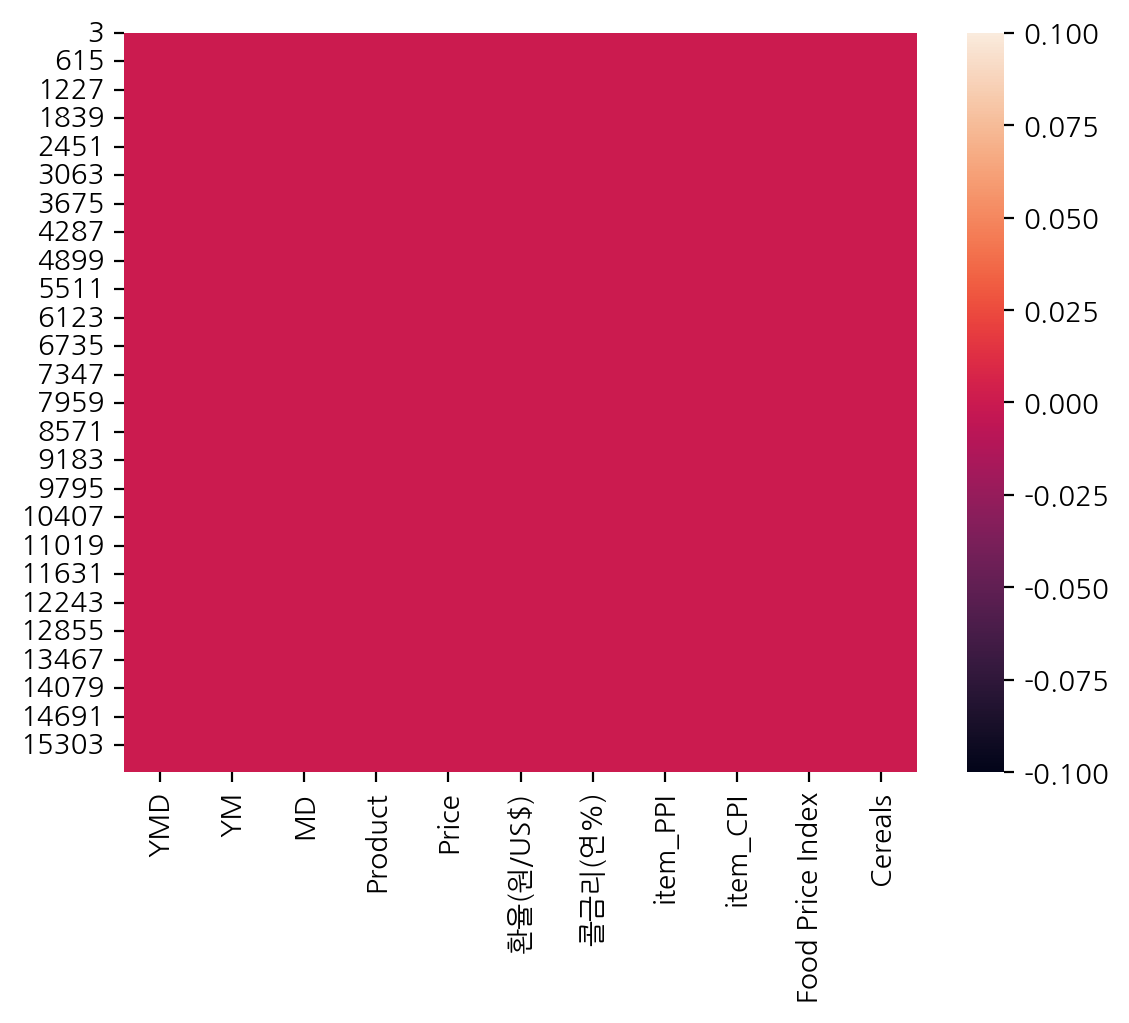



┌▣ df.isna().mean() ---- ---- ---- ----


,0
YMD,0.000
YM,0.000
MD,0.000
Product,0.000
Price,0.000
환율(원/US$),0.000
콜금리(연%),0.000
item_PPI,0.000
item_CPI,0.000
Food Price Index,0.000




┌▣ df.hist() ---- ---- ---- ----


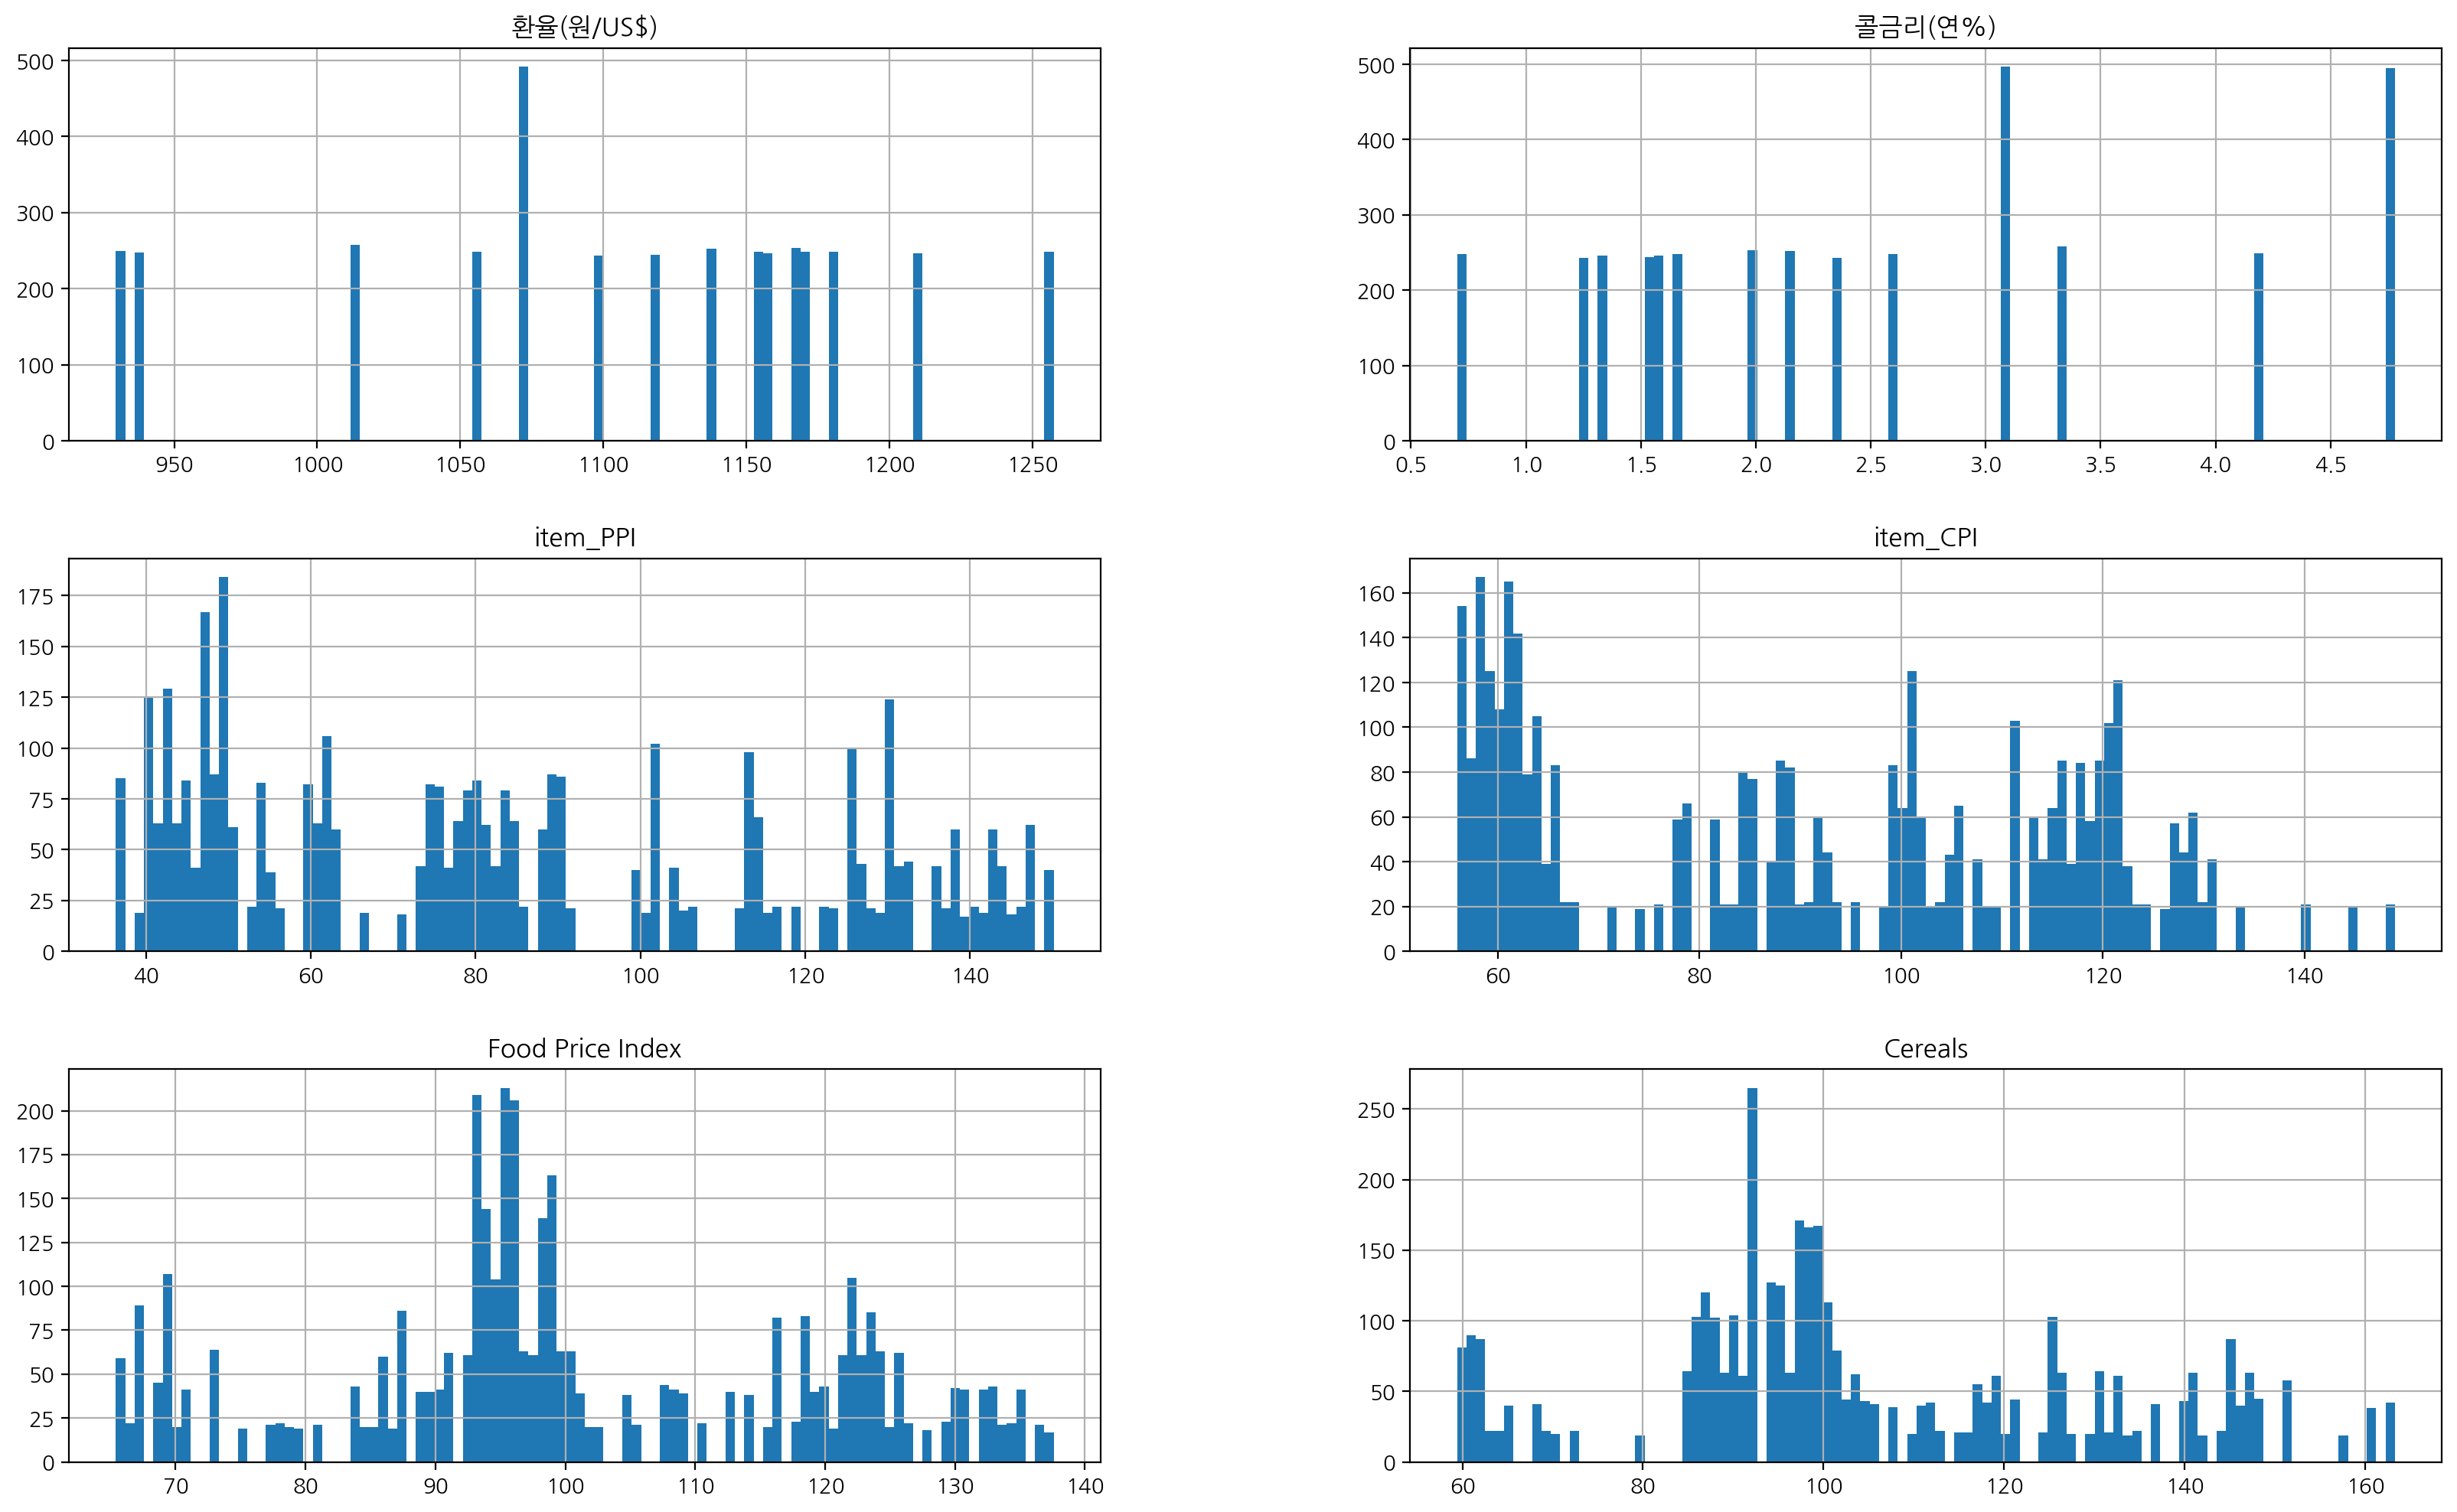



┌▣ df_log1p.hist() ---- ---- ---- ----


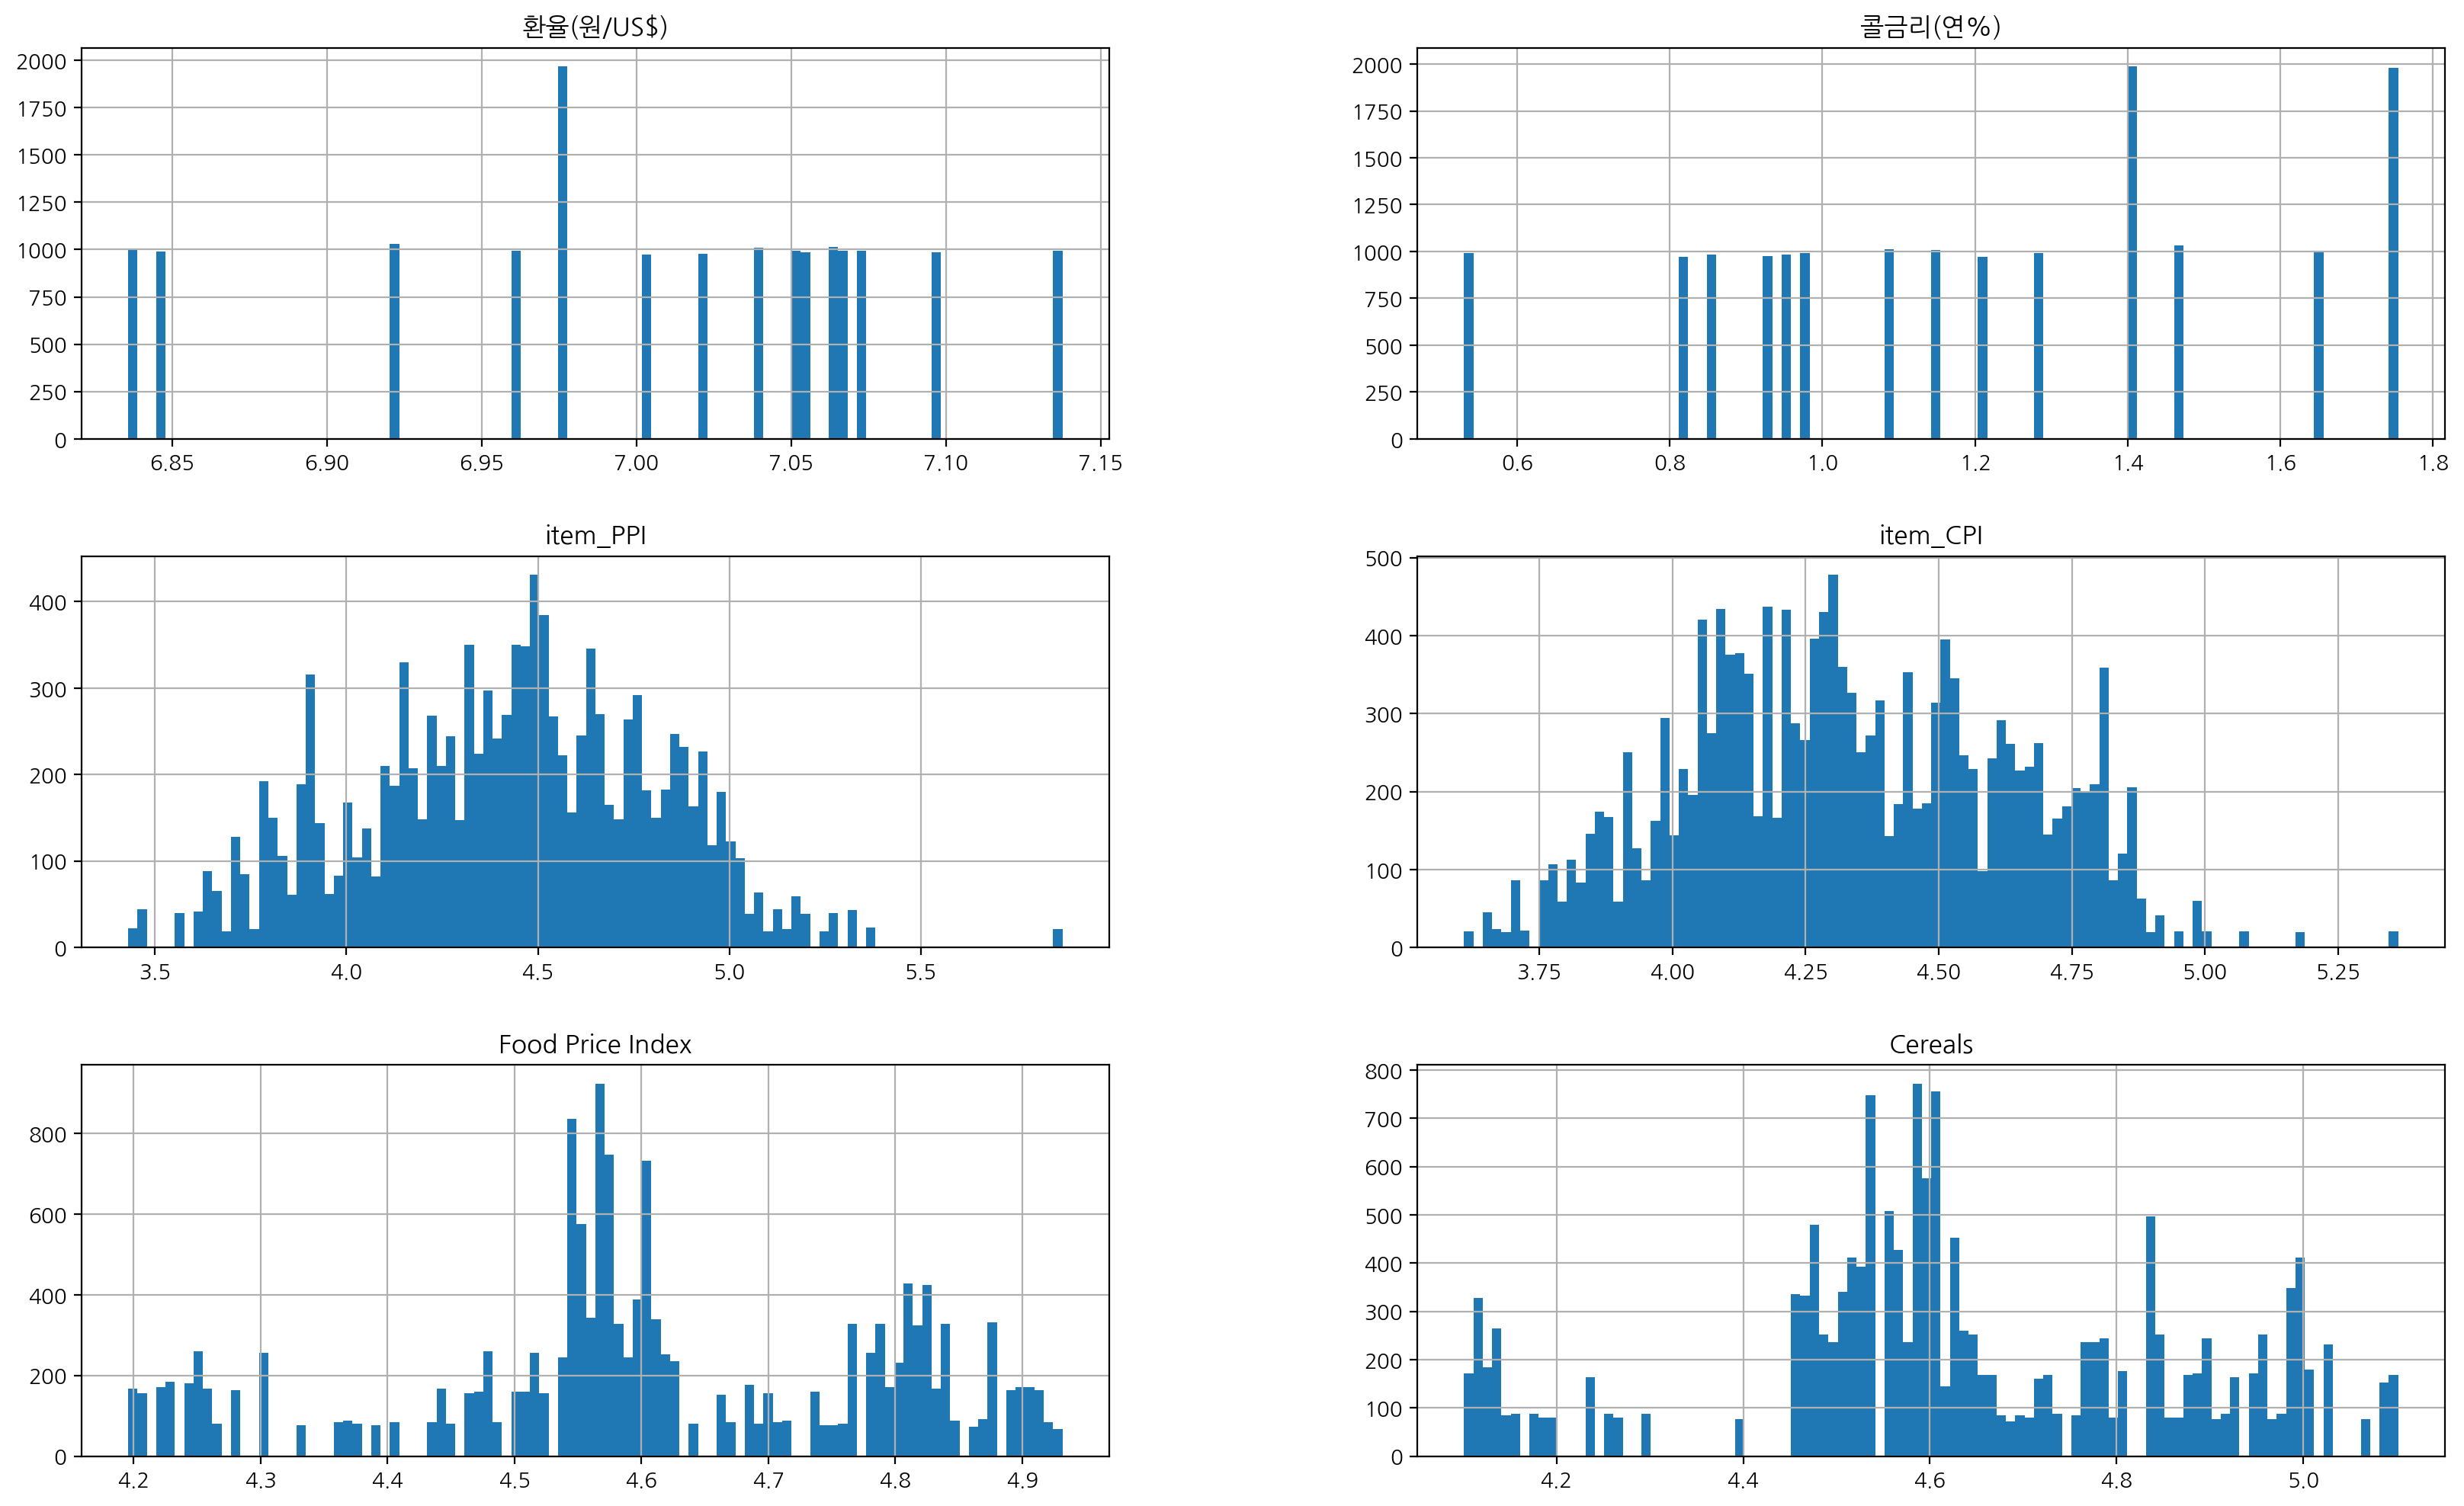



┌▣ df_log1p_robSc.hist() ---- ---- ---- ----


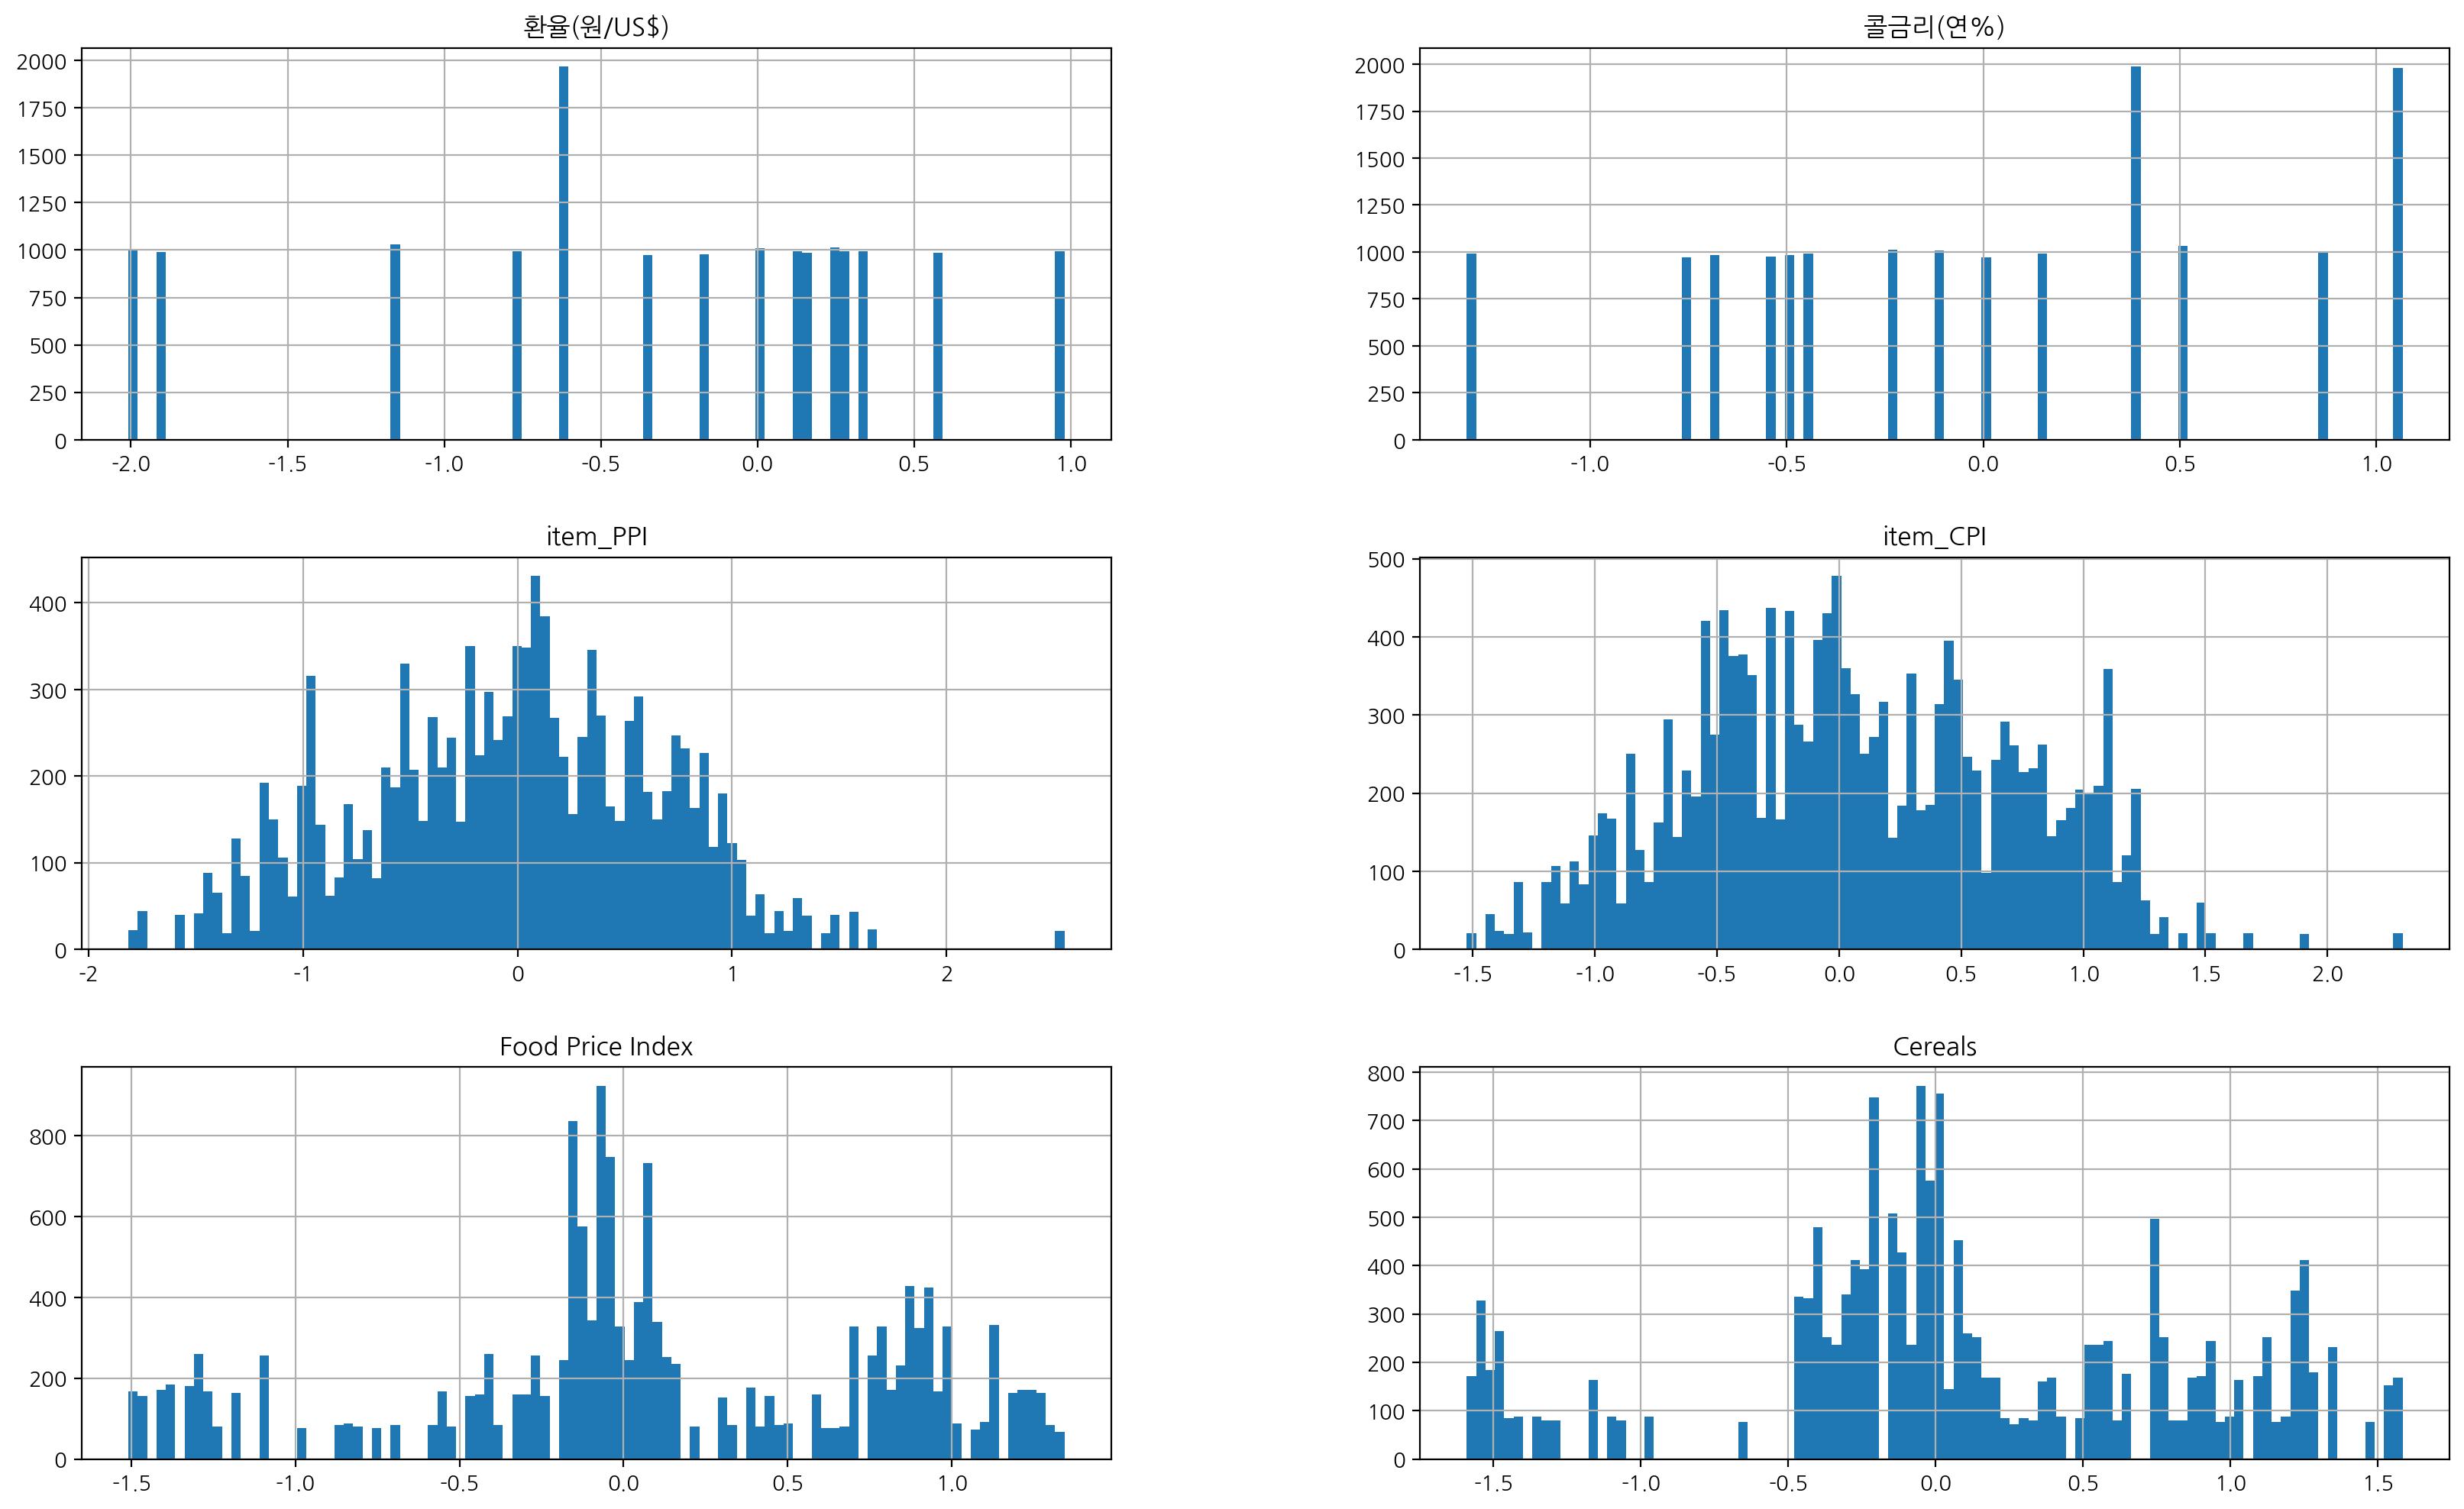

In [55]:
eda.uv()



┌▣ df.corr() ---- ---- ---- ----


,YMD,YM,MD,Price,환율(원/US$),콜금리(연%),item_PPI,item_CPI,Food Price Index,Cereals
YMD,1.000,1.000,0.003,0.716,0.464,-0.837,0.684,0.747,0.186,0.103
YM,1.000,1.000,0.003,0.716,0.464,-0.837,0.684,0.747,0.186,0.103
MD,0.003,0.003,1.000,-0.044,0.006,-0.001,0.012,0.037,0.032,0.007
Price,0.716,0.716,-0.044,1.000,0.348,-0.680,0.926,0.889,0.184,0.080
환율(원/US$),0.464,0.464,0.006,0.348,1.000,-0.451,0.322,0.352,0.355,0.351
콜금리(연%),-0.837,-0.837,-0.001,-0.680,-0.451,1.000,-0.653,-0.650,0.040,0.149
item_PPI,0.684,0.684,0.012,0.926,0.322,-0.653,1.000,0.957,0.181,0.079
item_CPI,0.747,0.747,0.037,0.889,0.352,-0.650,0.957,1.000,0.315,0.220
Food Price Index,0.186,0.186,0.032,0.184,0.355,0.040,0.181,0.315,1.000,0.959
Cereals,0.103,0.103,0.007,0.080,0.351,0.149,0.079,0.220,0.959,1.000




┌▣ sns.heatmap(data=df.corr(), annot=True, fmt=".2f") ---- ---- ---- ----


<AxesSubplot: >

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 6 and the array at index 1 has size 3970

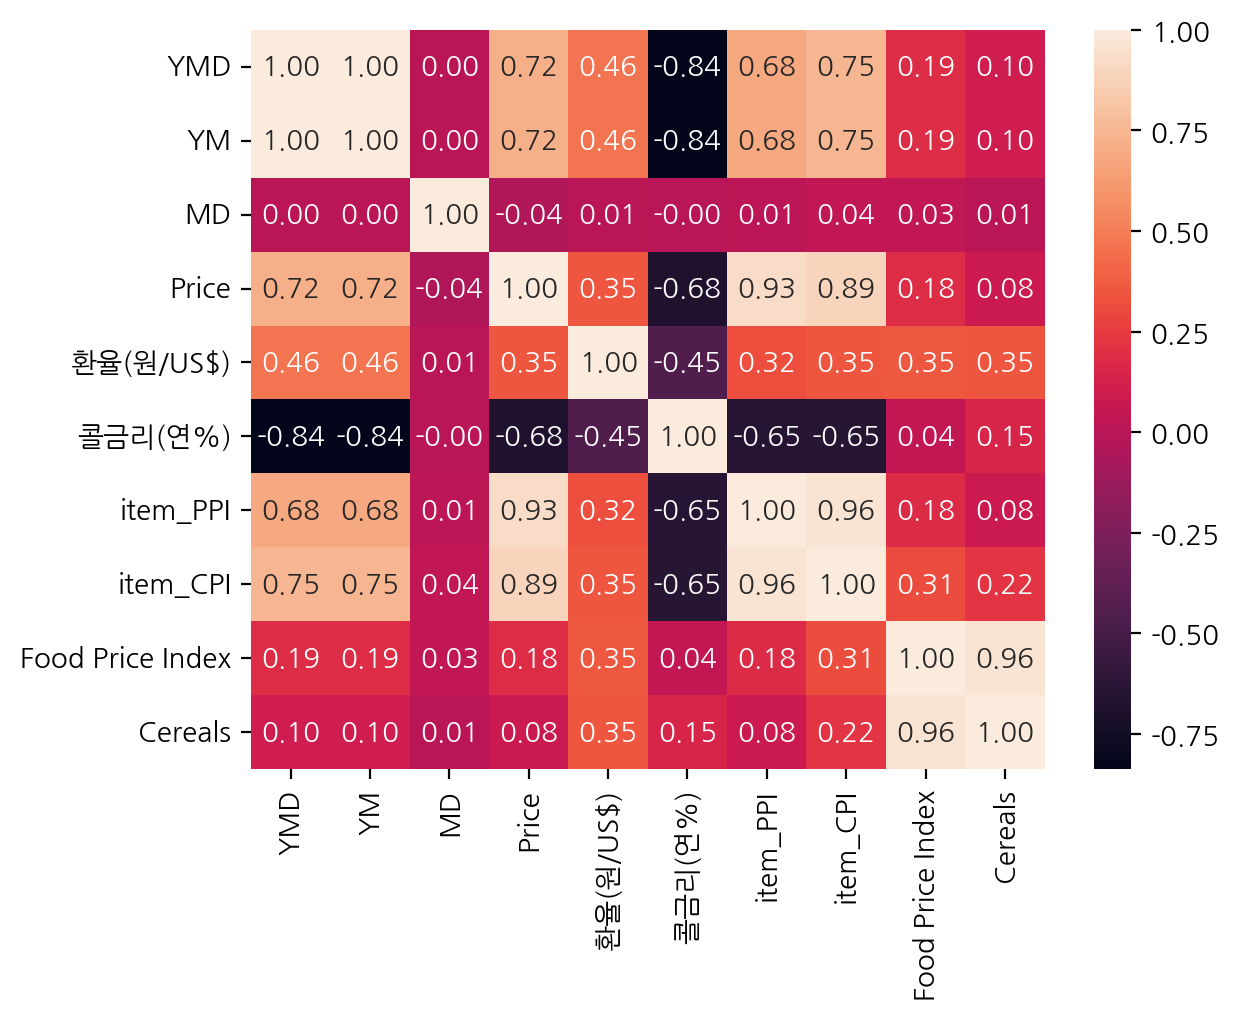

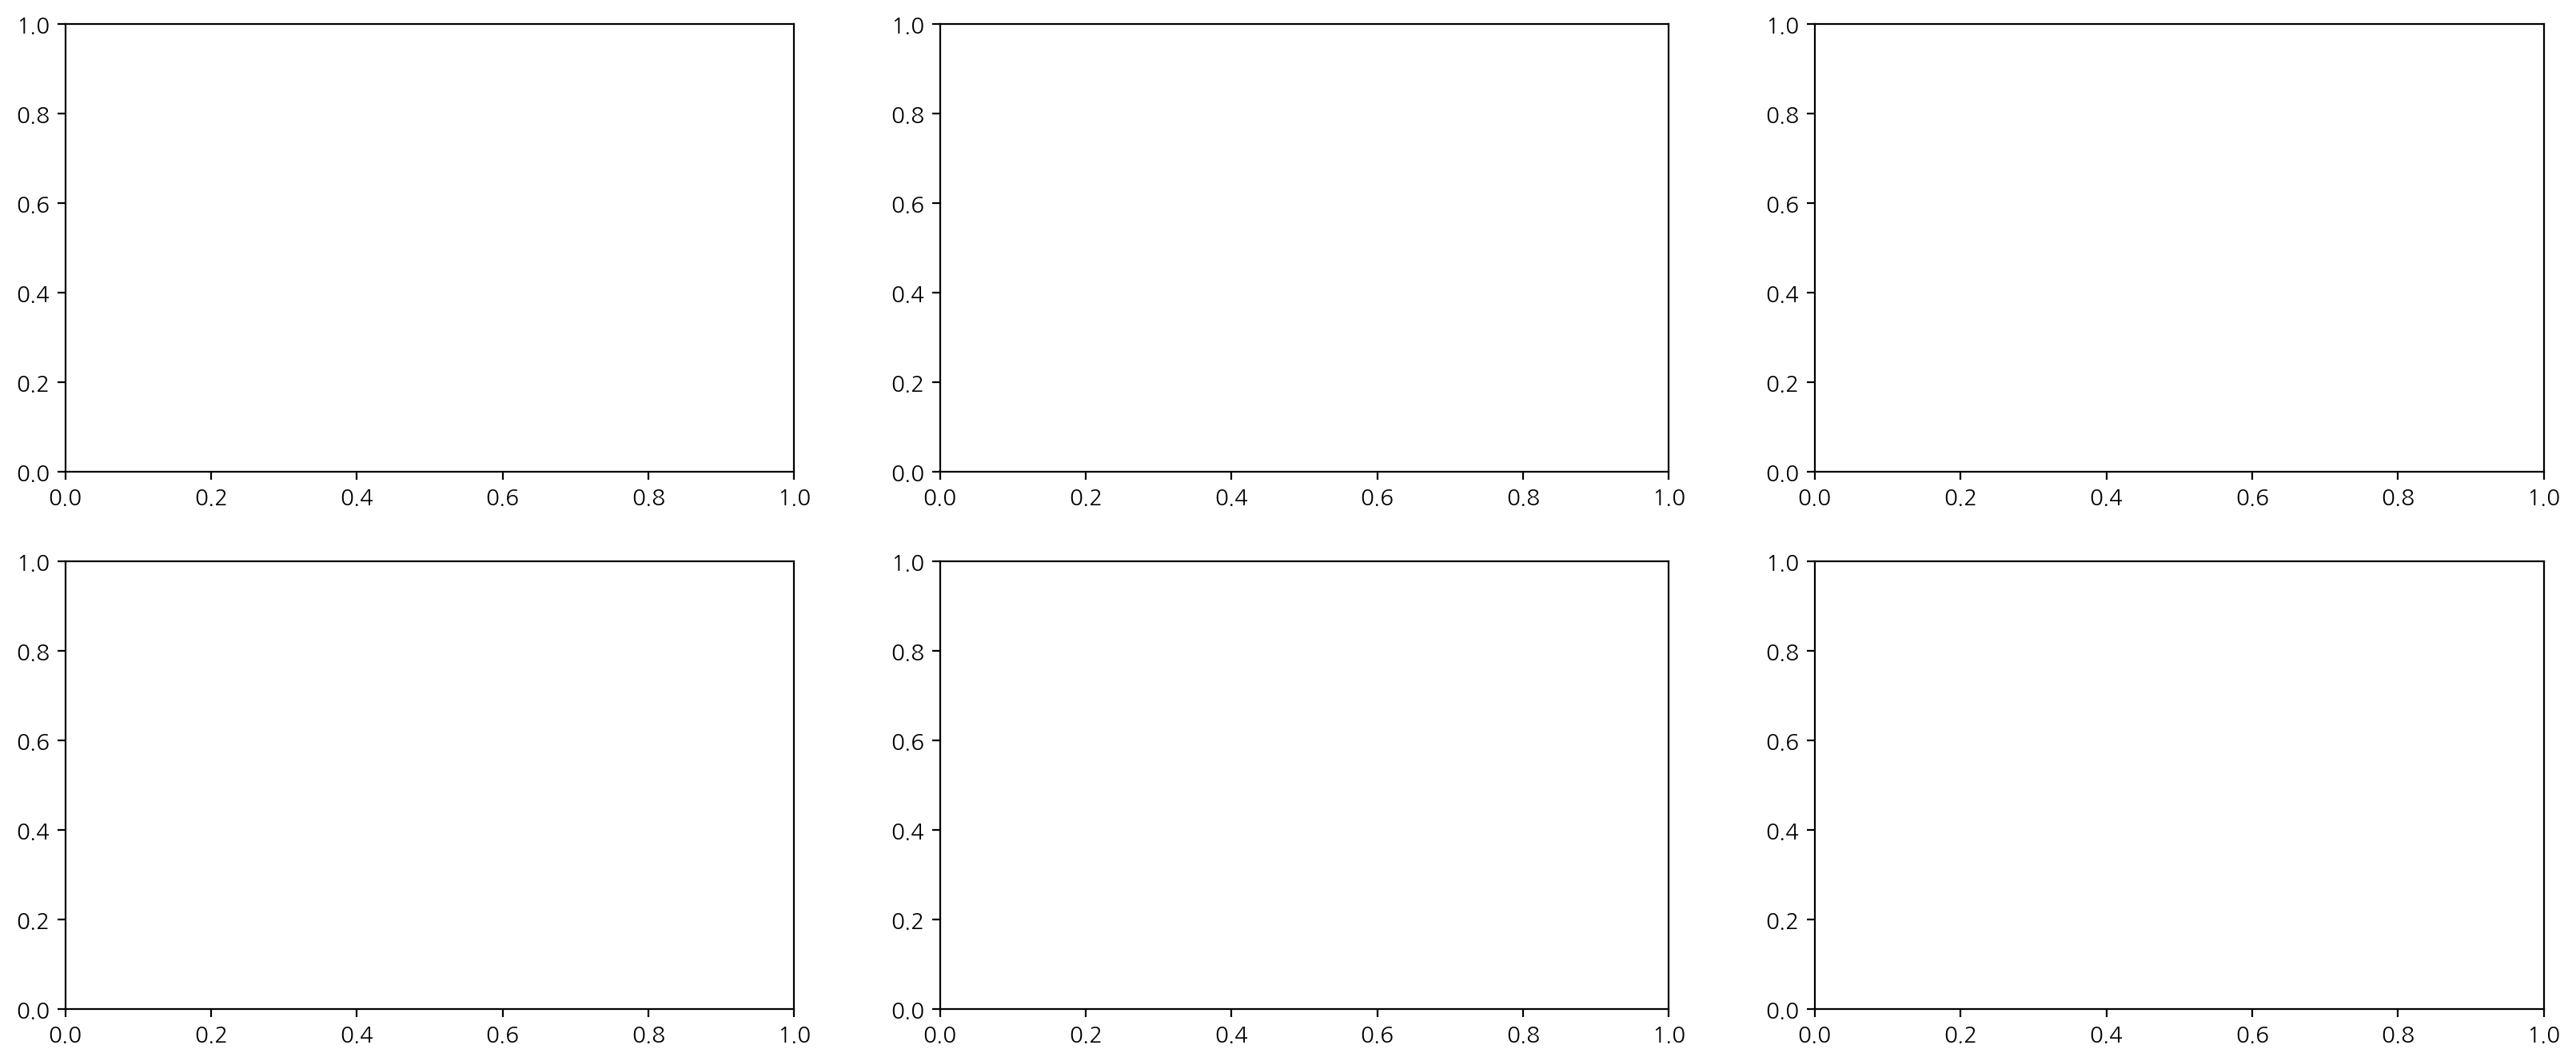

In [47]:
eda.mv()

In [43]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit_transform(df_log1p[col])
# transformer

df_log1p_robSca = df_log1p.copy()

df_log1p_robSca[col] = transformer
df_log1p_robSca

,YMD,YM,MD,Product,Price,환율(원/US$),콜금리(연%),item_PPI,item_CPI,Food Price Index,Cereals
3,20050103,200501,103,마늘,20785.714,-1.158,0.505,-0.556,-0.722,-1.509,-1.533
7,20050104,200501,104,마늘,20785.714,-1.158,0.505,-0.556,-0.722,-1.509,-1.533
11,20050105,200501,105,마늘,20928.571,-1.158,0.505,-0.556,-0.722,-1.509,-1.533
15,20050106,200501,106,마늘,21071.429,-1.158,0.505,-0.556,-0.722,-1.509,-1.533
19,20050107,200501,107,마늘,21071.429,-1.158,0.505,-0.556,-0.722,-1.509,-1.533
...,...,...,...,...,...,...,...,...,...,...,...
15863,20201224,202012,1224,마늘,53533.333,0.351,-1.314,0.310,0.438,0.434,0.519
15867,20201228,202012,1228,마늘,53533.333,0.351,-1.314,0.310,0.438,0.434,0.519
15871,20201229,202012,1229,마늘,53533.333,0.351,-1.314,0.310,0.438,0.434,0.519
15875,20201230,202012,1230,마늘,53533.333,0.351,-1.314,0.310,0.438,0.434,0.519


In [39]:
eda.mv()

AttributeError: 'EDA' object has no attribute 'corr'

# 시각화 (연도별)

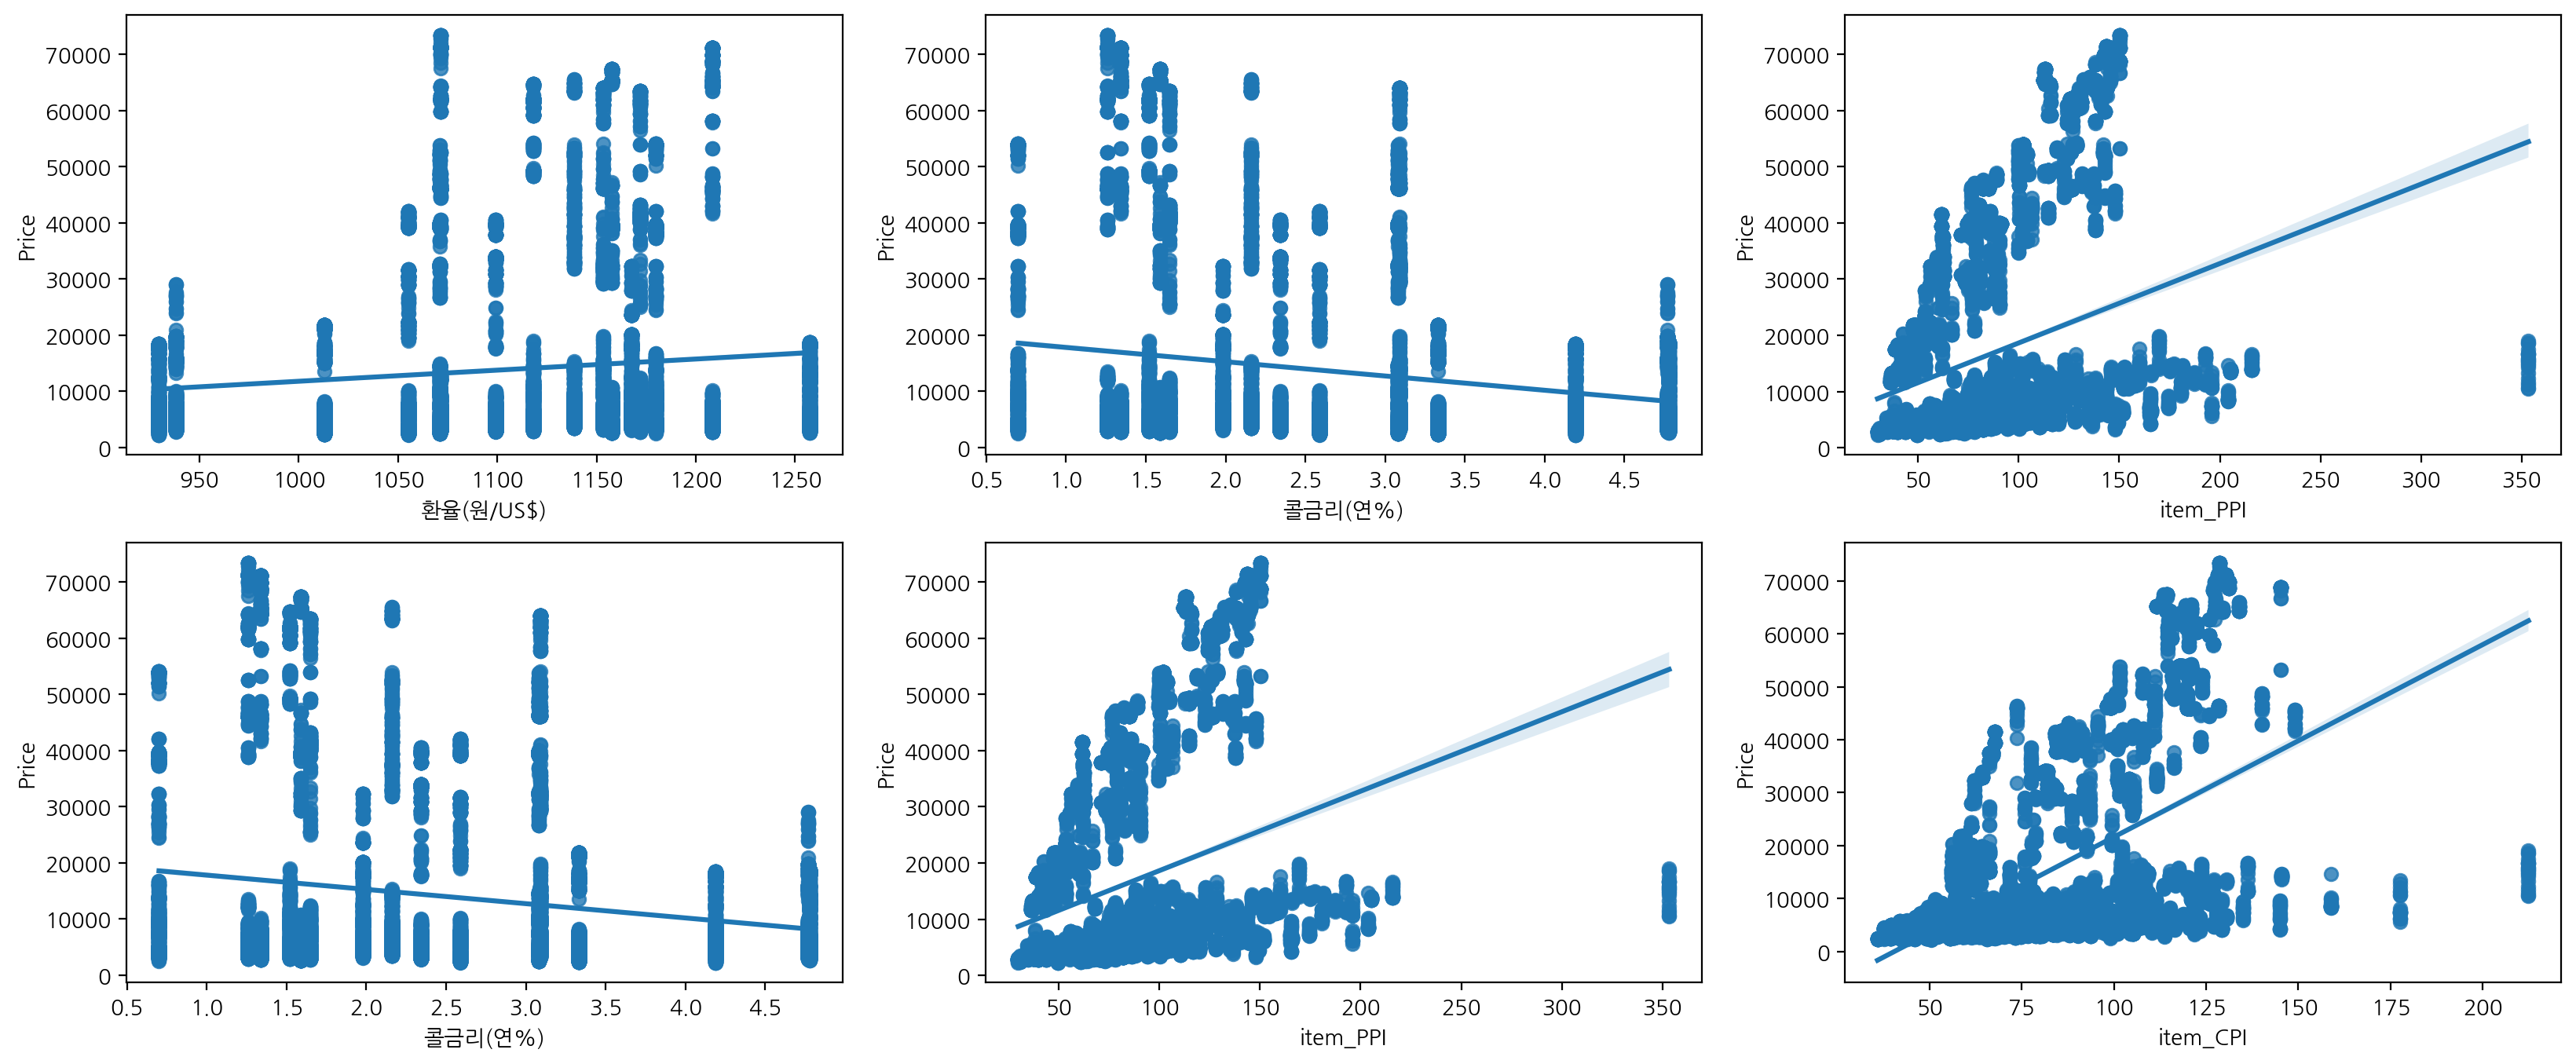

In [58]:
def test(df_raw):
    fig, axes = plt.subplots(2, 3, figsize=(20, 8))
    for i in range(2):
        for j in range(3):
            sns.regplot(data=df_raw, x=df_raw.columns[i+j+5], y='Price', ax=axes[i][j])

test(df_raw)

NameError: name 'transformer' is not defined

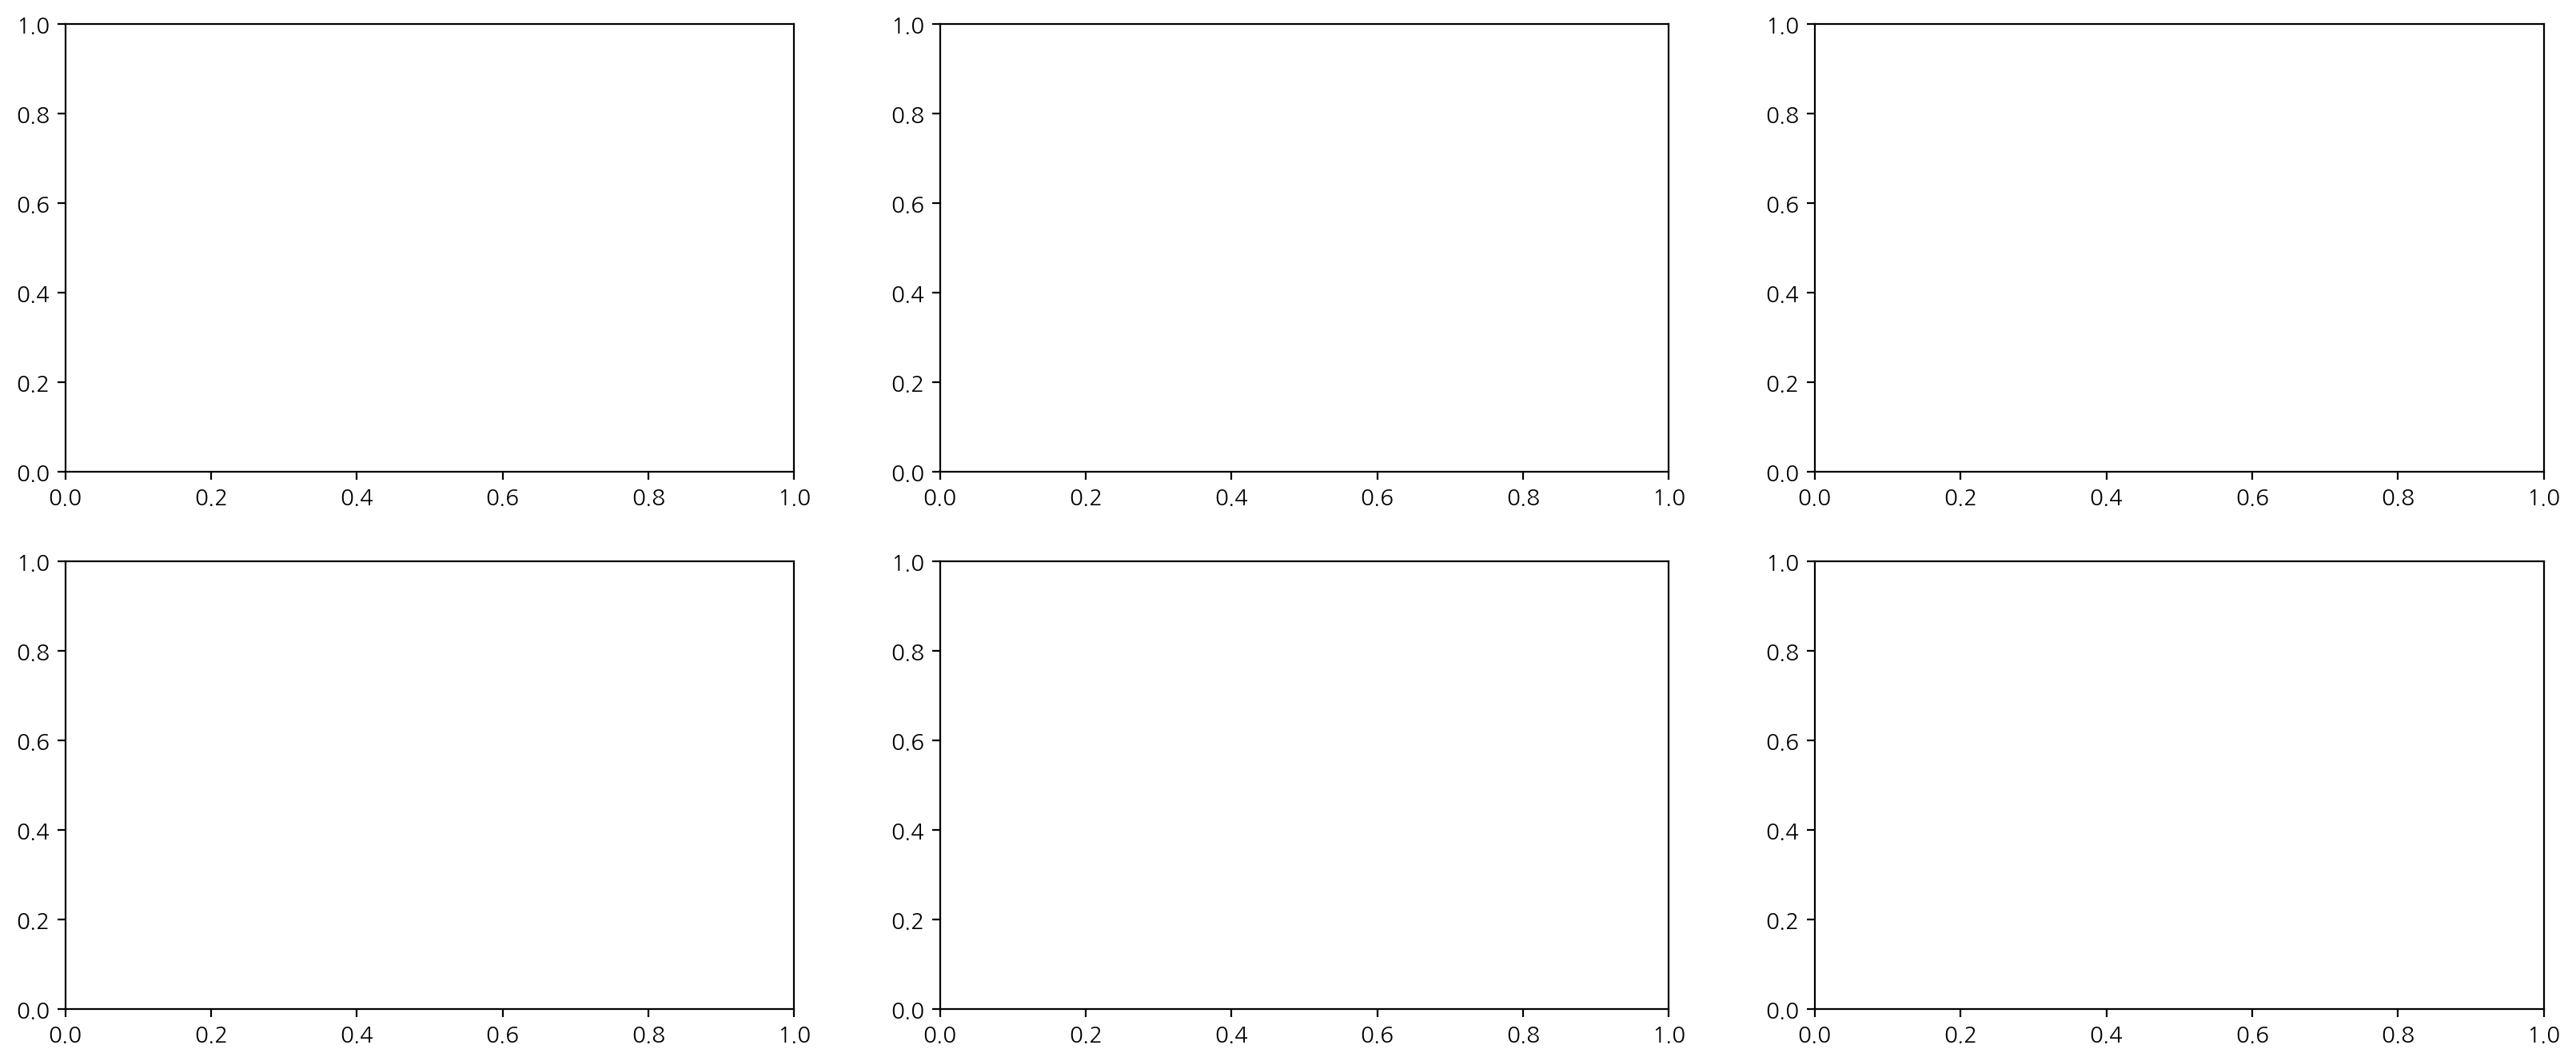

In [56]:
fig, axes = plt.subplots(2, 3, figsize=(20, 8))
for i in range(2):
    for j in range(3):
        sns.regplot(data=transformer, x=transformer.columns[i+j+5], y='Price', ax=axes[i][j])

In [21]:
def AgriMarket_EDA(product:str, year:tuple) -> None:

    # input
    # product = input('품목을 입력하세요. : ')
    # start = int(input('시작 연도를 입력하세요. (4자리) : '))
    # end = int(input('끝 연도를 입력하세요. (4자리) : '))
    # print()
    start = year[0]
    end = year[1]
    
    
    if product not in product_w:
        print('해당 제품의 도매 거래내역이 없습니다.')
    
    elif ((min(df_gw[df_gw['Product']==product]['Y']) > end) | (max(df_gw[df_gw['Product']==product]['Y']) < start)):
        print('해당 일자에 제품의 도매 거래내역이 없습니다.')  
    
    else:
        df_gw[(df_gw['Product']==product) & (df_gw['Y'] >= start) & (df_gw['Y'] <= end)].groupby(['YMD'])[['Price']].mean().plot(figsize=(20,8))
        plt.title(f'{product} {start}~{end}년 도매가격 변동 그래프', fontsize=20)

    
    if product not in product_r:
        print('해당 제품의 소매 거래내역이 없습니다.')
    
    elif ((min(df_gr[df_gr['Product']==product]['Y']) > end) | (max(df_gr[df_gr['Product']==product]['Y']) < start)):
        print('해당 일자에 제품의 소매 거래내역이 없습니다.')
        
    else:
        df_gr[(df_gr['Product']==product) & (df_gr['Y'] >= start) & (df_gr['Y'] <= end)].groupby(['YMD'])[['Price']].mean().plot(figsize=(20,8))
        plt.title(f'{product} {start}~{end}년 소매가격 변동 그래프', fontsize=20)

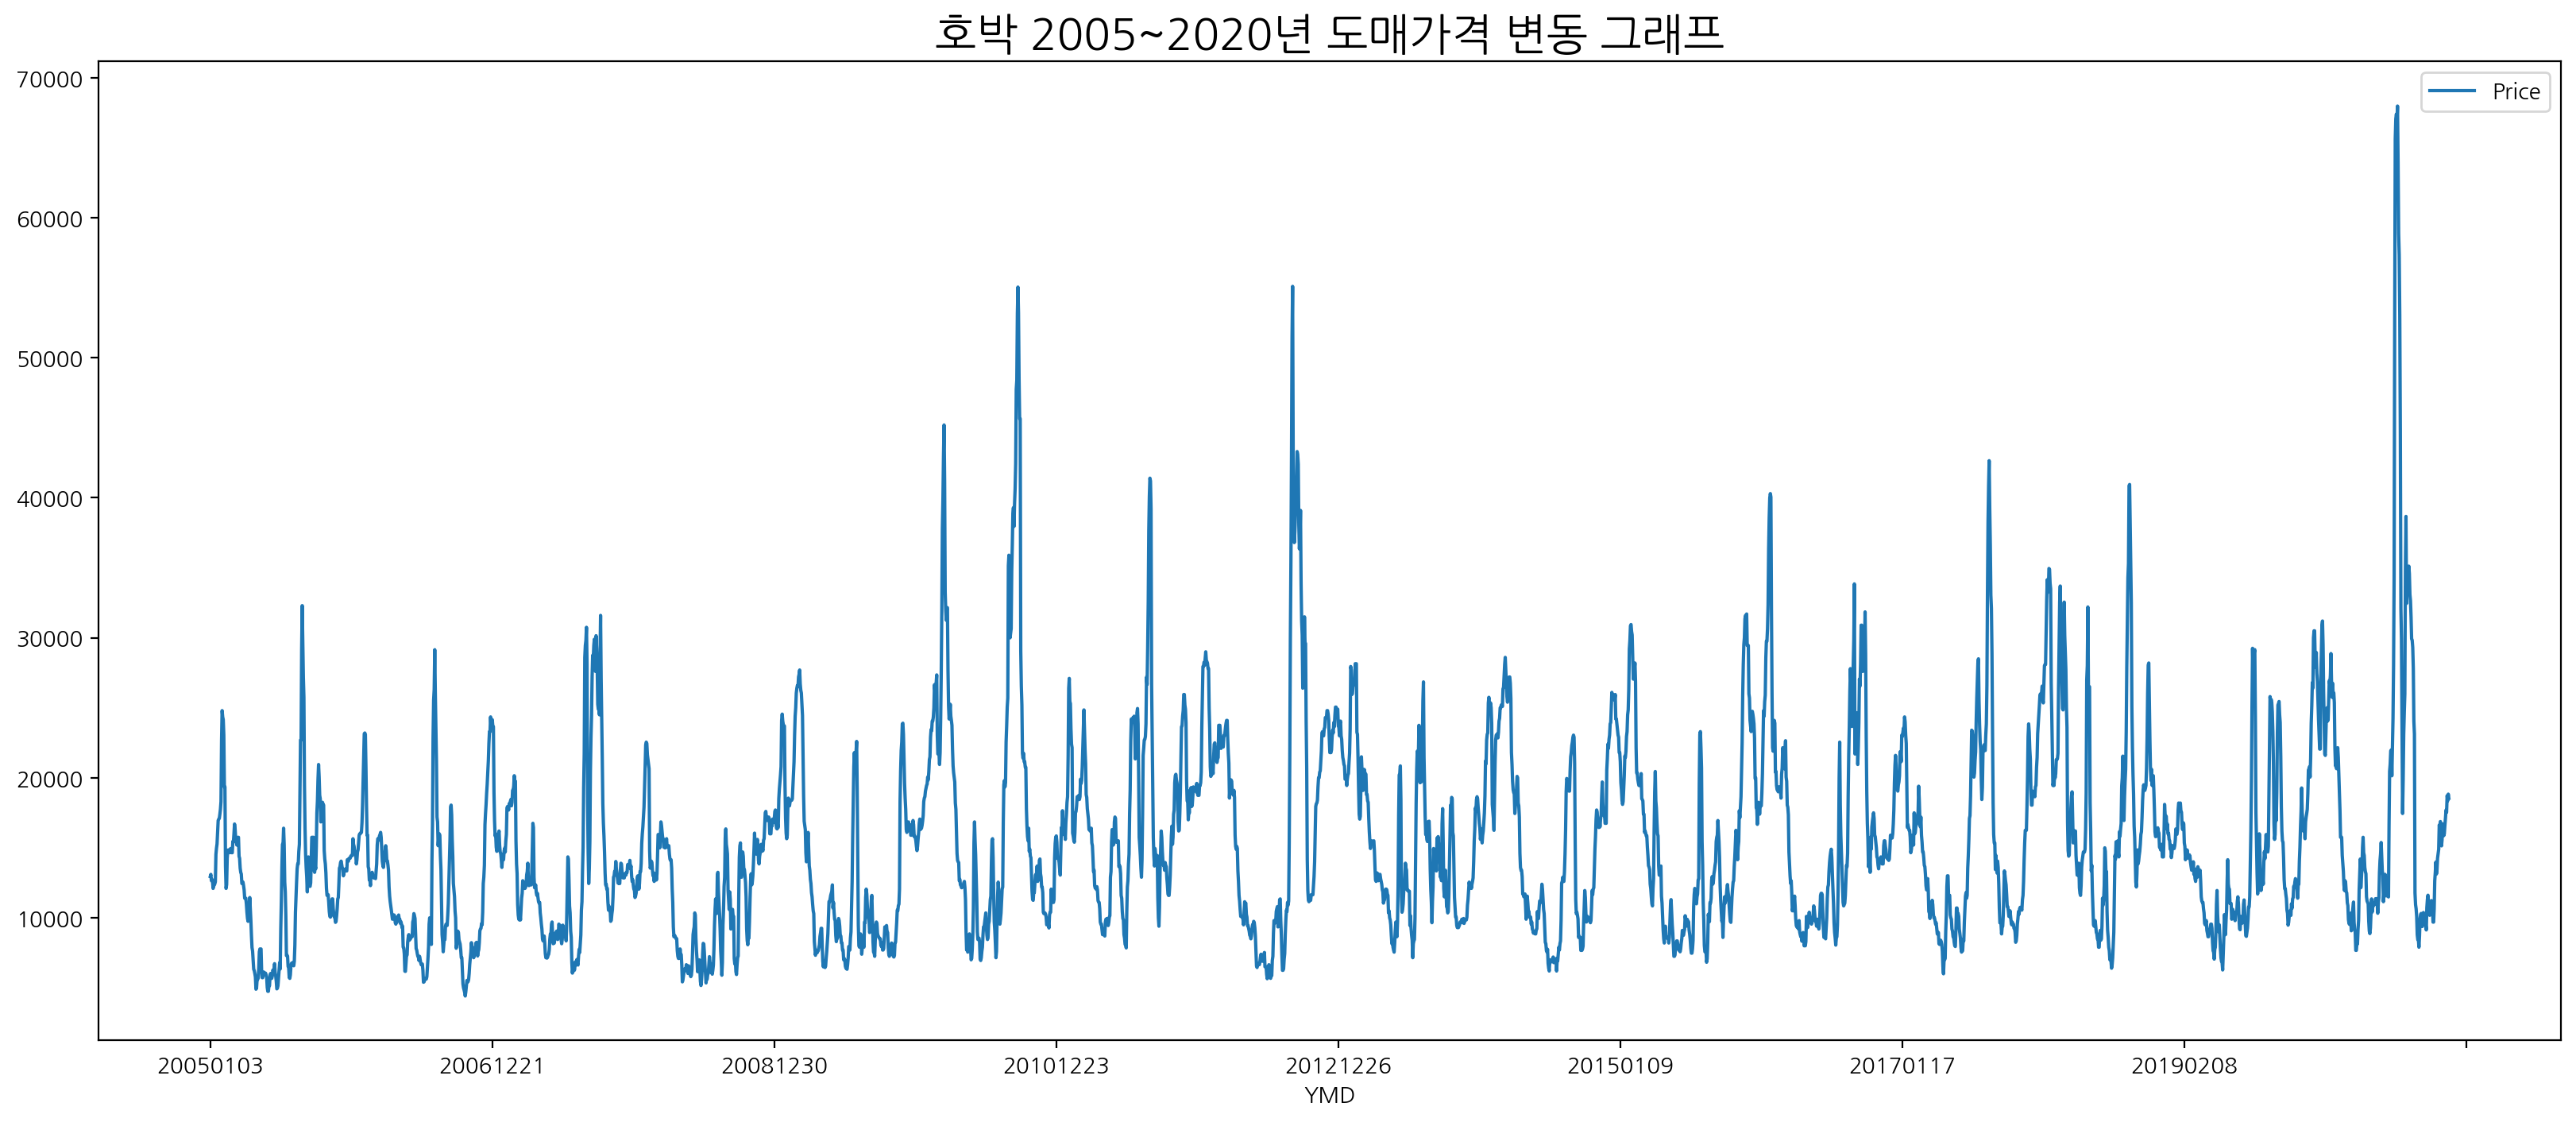

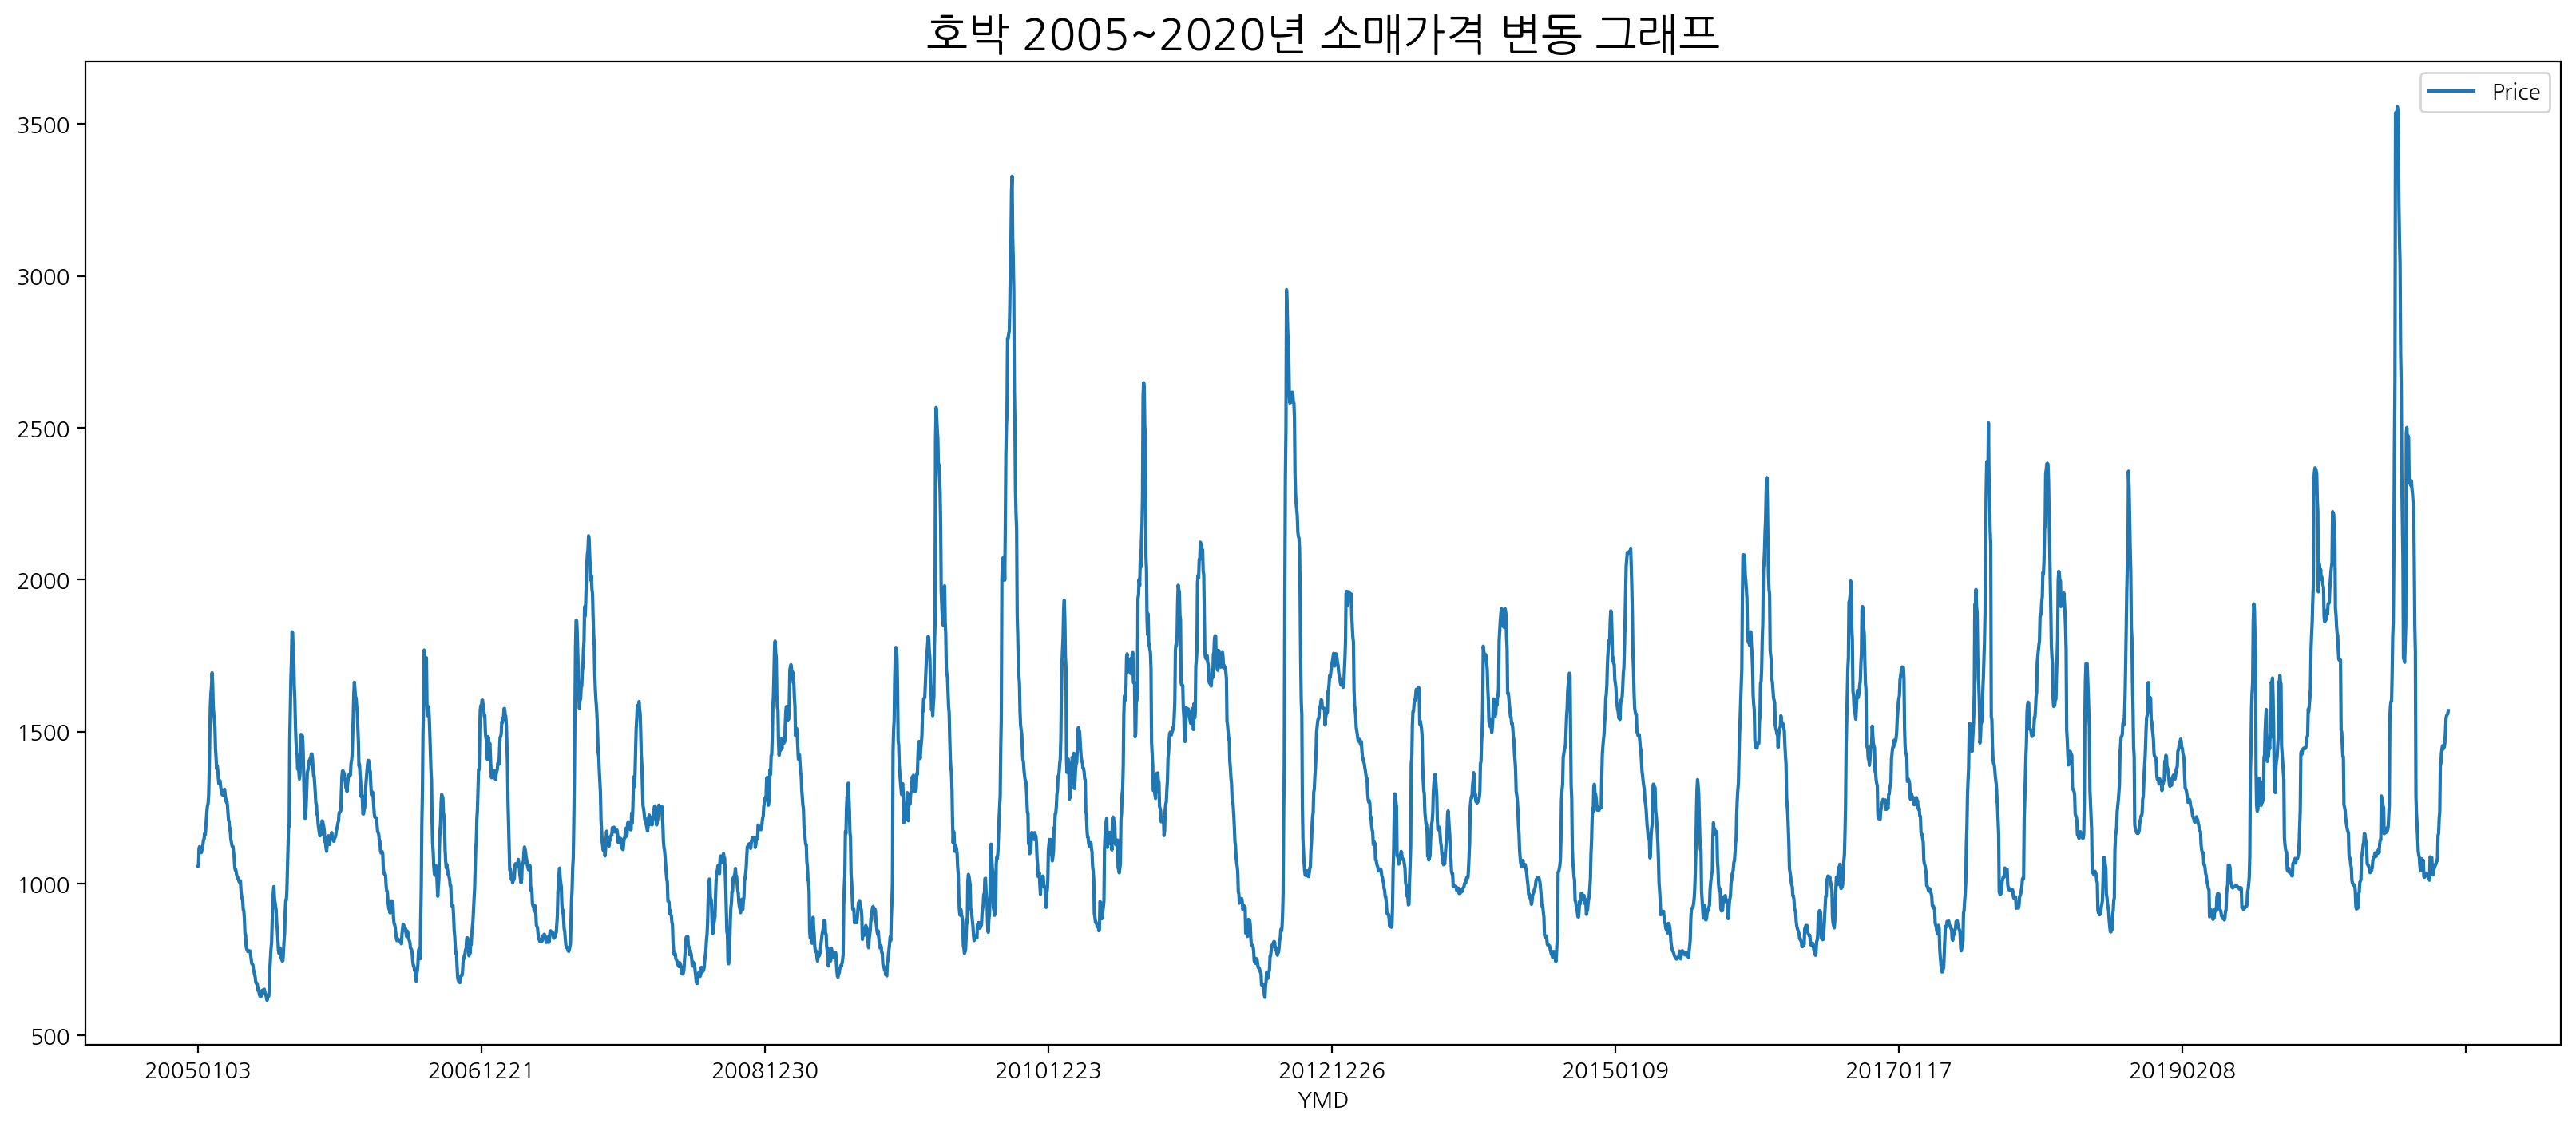

In [22]:
AgriMarket_EDA("호박", (2005, 2020))

# 시각화 (계절별)

In [25]:
def AgriMarket_viz(product:str, year:tuple) -> None:

    # input
    # product = input('품목을 입력하세요. : ')
    # start = int(input('시작 연도를 입력하세요. (4자리) : '))
    # end = int(input('끝 연도를 입력하세요. (4자리) : '))
    # print()
    start = year[0]
    end = year[1]
    
    
    if product not in product_w:
        print('해당 제품의 도매 거래내역이 없습니다.')
    
    elif ((min(df_gw[df_gw['Product']==product]['Y']) > end) | (max(df_gw[df_gw['Product']==product]['Y']) < start)):
        print('해당 일자에 제품의 도매 거래내역이 없습니다.')  
    
    else:
        df_gw[(df_gw['Product']==product) & (df_gw['Y'] >= start) & (df_gw['Y'] <= end)].groupby(['MD'])[['Price']].mean().plot(figsize=(20,8))
        plt.title(f'{product} {start}~{end}년 도매가격 변동 그래프', fontsize=20)

    
    if product not in product_r:
        print('해당 제품의 소매 거래내역이 없습니다.')
    
    elif ((min(df_gr[df_gr['Product']==product]['Y']) > end) | (max(df_gr[df_gr['Product']==product]['Y']) < start)):
        print('해당 일자에 제품의 소매 거래내역이 없습니다.')
        
    else:
        df_gr[(df_gr['Product']==product) & (df_gr['Y'] >= start) & (df_gr['Y'] <= end)].groupby(['MD'])[['Price']].mean().plot(figsize=(20,8))
        plt.title(f'{product} {start}~{end}년 소매가격 변동 그래프', fontsize=20)

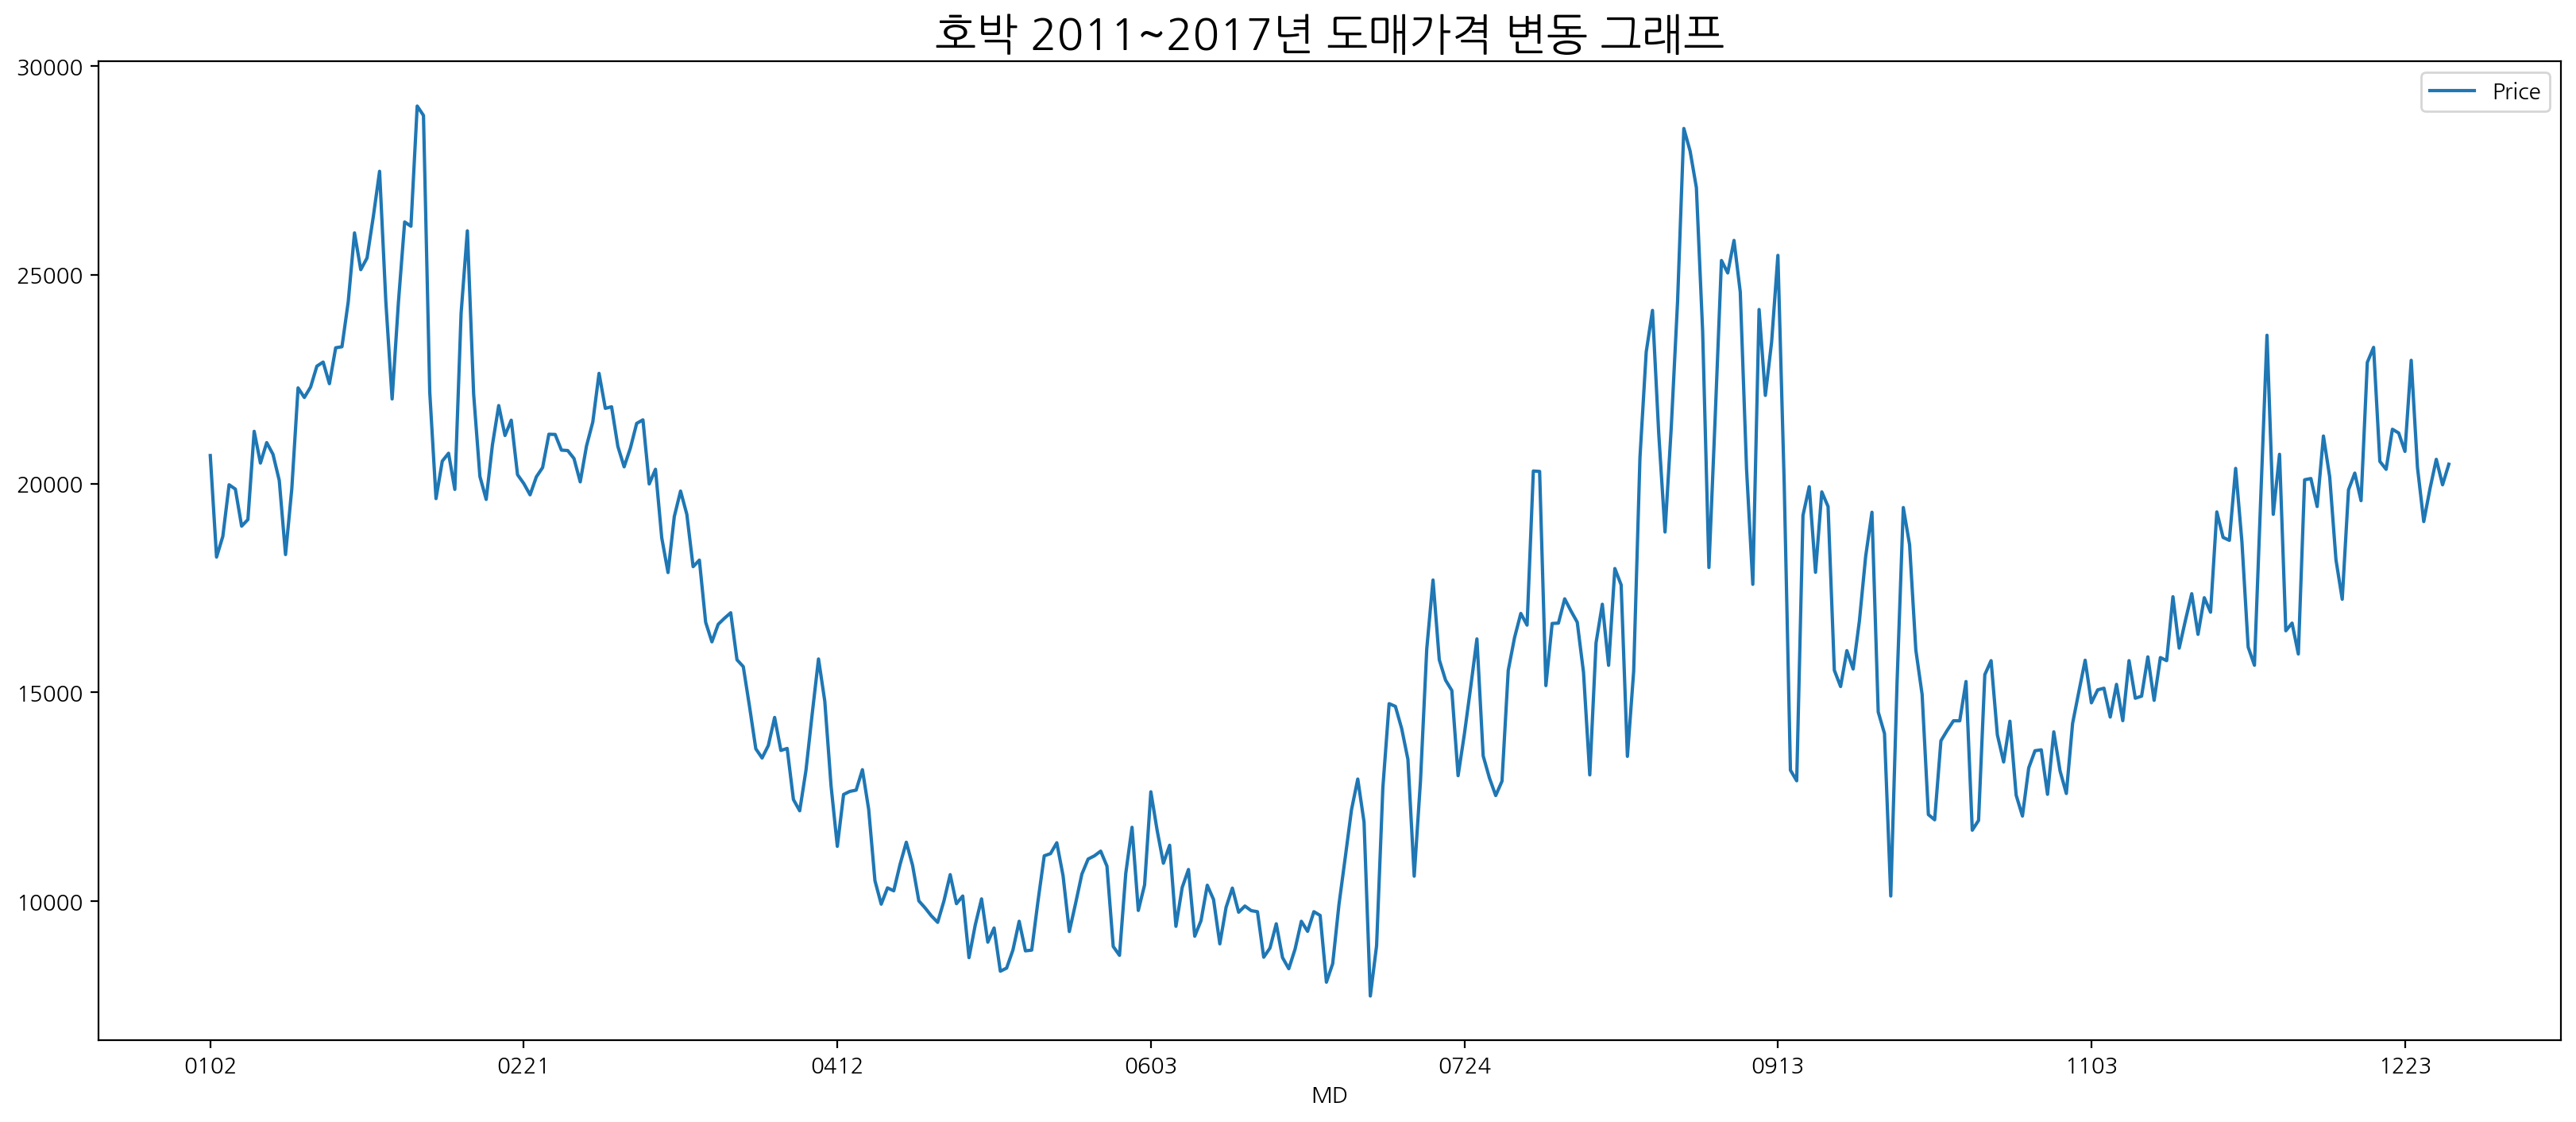

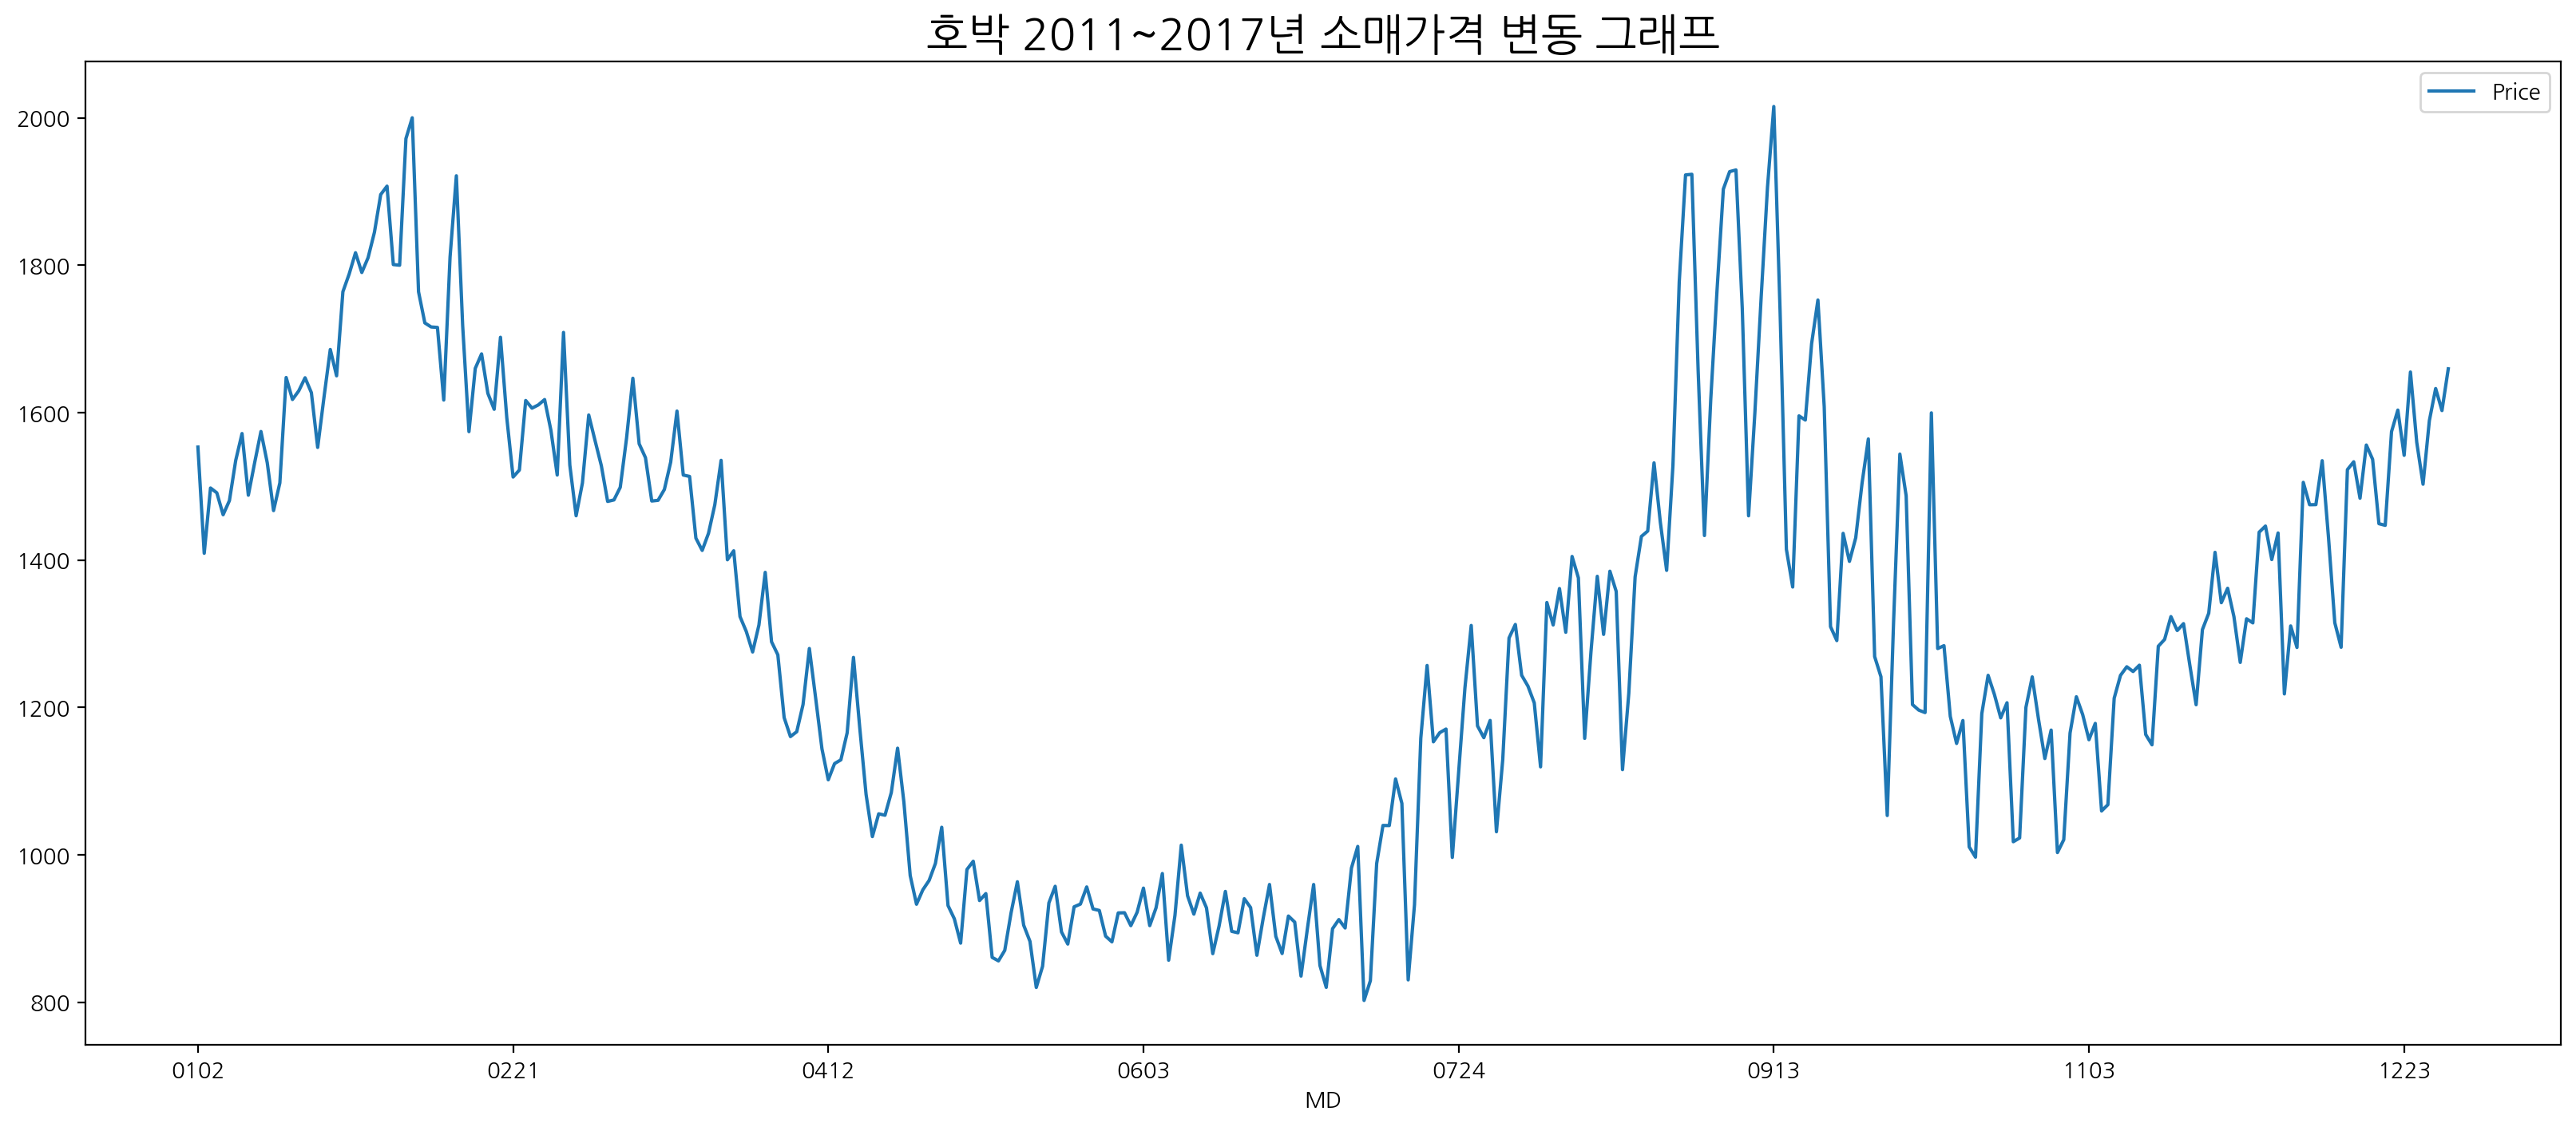

In [26]:
AgriMarket_viz("aksmf", (2011, 2017))

In [ ]:
1